# Import Libraries

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.spatial.distance import euclidean

In [10]:
try:
  from google.colab import drive
  drive.mount('/content/drive')
  import sys
  path_to_project = '/content/drive/MyDrive/FairAlgorithm'
  sys.path.append(path_to_project)
  !sudo apt install libcairo2-dev pkg-config python3-dev
  IN_COLAB = True
except:
  IN_COLAB = False

Mounted at /content/drive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-dev is already the newest version (3.10.6-1~22.04.1).
python3-dev set to manually installed.
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libblkid-dev libblkid1 libcairo-script-interpreter2 libffi-dev
  libglib2.0-dev libglib2.0-dev-bin libice-dev liblzo2-2 libmount-dev
  libmount1 libpixman-1-dev libselinux1-dev libsepol-dev libsm-dev
  libxcb-render0-dev libxcb-shm0-dev
Suggested packages:
  libcairo2-doc libgirepository1.0-dev libglib2.0-doc libgdk-pixbuf2.0-bin
  | libgdk-pixbuf2.0-dev libxml2-utils libice-doc cryptsetup-bin libsm-doc
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libblkid-dev libcairo-script-interpreter2 

# Load Fairness Metrics

In [11]:
# Load the metrics results
def load_metrics(dataset_name, sensible_attribute, mitigation):
  load_path = path_to_project + '/measurements/metrics-{}-{}-{}.p'.format(dataset_name, sensible_attribute, mitigation)
  with open(load_path, 'rb') as fp:
      mitigation_metrics = pickle.load(fp)
  return mitigation_metrics

def load_performance_metrics(dataset_name, sensible_attribute, mitigation):
  load_path = path_to_project + '/measurements/performance_metrics-{}-{}-{}.p'.format(dataset_name, sensible_attribute, mitigation)
  with open(load_path, 'rb') as fp:
      mitigation_metrics = pickle.load(fp)
  return mitigation_metrics

In [12]:
path_to_project = '/content/drive/MyDrive/FairAlgorithm'
m= load_metrics("diabetes-women", "AgeCategory", "aif360-di")
print(m)
print(m['division']['Logistic Regression']['GroupFairness'][0])

{'division': {'Logistic Regression': {'GroupFairness': [0.4517891088107605, 0.2083289953135814], 'PredictiveParity': [0.3142920281830886, 0.13910453585930366], 'PredictiveEquality': [0.4512830687830688, 0.49461740533062587], 'EqualOpportunity': [0.425, 0.7586995452746759], 'EqualizedOdds': [0.5739500119763278, 0.41794233966138317], 'ConditionalUseAccuracyEquality': [0.5226360044682412, 0.29493172273821866], 'OverallAccuracyEquality': [0.0471195471195471, 0.7634541160623812], 'TreatmentEquality': [-0.37417989417989417, 0.5444121421302672], 'FORParity': [-0.3868485945885326, 0.5539171756646035], 'FN': [0.5688307493540051, 0.4315130306832653], 'FP': [-0.49286758255264196, 0.2134111596925504]}, 'Decision Tree': {'GroupFairness': [0.4517891088107605, 0.2083289953135814], 'PredictiveParity': [0.3142920281830886, 0.13910453585930366], 'PredictiveEquality': [0.4512830687830688, 0.49461740533062587], 'EqualOpportunity': [0.425, 0.7586995452746759], 'EqualizedOdds': [0.5739500119763278, 0.417942

In [ ]:
p= load_performance_metrics("diabetes-women", "AgeCategory", "aif360-di")
print(p)

{'accuracy': {'Logistic Regression': [0.745273631840796, 0.059693200087445344], 'Decision Tree': [0.745273631840796, 0.059693200087445344], 'Bagging': [0.745273631840796, 0.059693200087445344], 'Random Forest': [0.745273631840796, 0.059693200087445344], 'Extremely Randomized Trees': [0.745273631840796, 0.059693200087445344], 'Ada Boost': [0.745273631840796, 0.059693200087445344]}, 'precision': {'Logistic Regression': [0.655691142956391, 0.12530309452347085], 'Decision Tree': [0.655691142956391, 0.12530309452347085], 'Bagging': [0.655691142956391, 0.12530309452347085], 'Random Forest': [0.655691142956391, 0.12530309452347085], 'Extremely Randomized Trees': [0.655691142956391, 0.12530309452347085], 'Ada Boost': [0.655691142956391, 0.12530309452347085]}, 'recall': {'Logistic Regression': [0.5215749675734196, 0.08594057016535381], 'Decision Tree': [0.5215749675734196, 0.08594057016535381], 'Bagging': [0.5215749675734196, 0.08594057016535381], 'Random Forest': [0.5215749675734196, 0.0859405

In [13]:
dataset_list = ["diabetes-women"] # TO DO: aggiungere tutte le possibilità
#mitigation_list = ['original', 'fl-cr', 'fl-to', 'aif360-rw', 'aif360-di', 'aif360-lfr', 'aif360-ad', 'aif360-pr', 'aif360-cepp', 'aif360-eopp', 'aif360-roc'] # TO DO: aggiungere tutte le possibilità
mitigation_list = ['original', 'fl-cr', 'aif360-rw', 'aif360-di', 'aif360-lfr',  'aif360-op', "aif360-ad", "aif360-er", 'aif360-roc', 'aif360-ce', 'fl-to']
preprocessing_mitigation_list = ['fl-cr', 'aif360-rw', 'aif360-di', 'aif360-lfr', 'aif360-op']
inprocessing_mitigation_list = ["aif360-ad", "aif360-er"]  # , 'aif360-pr'] DA AGGIUNGERE APPENA FUNZIONA
postprocessing_mitigation_list = ['aif360-roc', 'aif360-ce', 'fl-to'] #'aif360-eo' DA AGGIUNGERE APPENA FUNZIONA
comparison = ['division', 'subtraction']
models = ['Logistic Regression', 'Decision Tree', 'Bagging', 'Random Forest', 'Extremely Randomized Trees', 'Ada Boost']
metrics = ['GroupFairness', 'PredictiveParity', 'PredictiveEquality', 'EqualOpportunity', 'EqualizedOdds', 'ConditionalUseAccuracyEquality', 'OverallAccuracyEquality', 'TreatmentEquality', 'FORParity', 'FN', 'FP']

In [16]:
overall_metrics = {}
preprocessing_metrics = {}
inprocessing_metrics = {}
postprocessing_metrics = {}

# Load metrics for all datasets and mitigations
for dataset in dataset_list:
  ds_metrics = {}
  pre_metrics = {}
  in_metrics = {}
  post_metrics = {}
  for mitigation in mitigation_list:
    ds_metrics[mitigation] = load_metrics(dataset, sensible_attribute, mitigation)
  for mitigation in preprocessing_mitigation_list:
    pre_metrics[mitigation] = load_metrics(dataset, sensible_attribute, mitigation)
  for mitigation in inprocessing_mitigation_list:
    in_metrics[mitigation] = load_metrics(dataset, sensible_attribute, mitigation)
  for mitigation in postprocessing_mitigation_list:
    post_metrics[mitigation] = load_metrics(dataset, sensible_attribute, mitigation)
  overall_metrics[dataset] = ds_metrics
  preprocessing_metrics[dataset] = pre_metrics
  inprocessing_metrics[dataset] = in_metrics
  postprocessing_metrics[dataset] = post_metrics


NameError: name 'sensible_attribute' is not defined

In [ ]:
# Load original measurements for each dataset and add to dictionary
for dataset in dataset_list:
  original_metrics = {}
  load_path = path_to_project + '/measurements/metrics-{}-original.p'.format(dataset)
  with open(load_path, 'rb') as fp:
      original_metrics = pickle.load(fp)
  overall_metrics[dataset]['original'] = original_metrics
  preprocessing_metrics[dataset]['original'] = original_metrics
  for m in models:
    orig_metrics = {}
    orig_metrics['division'] = original_metrics['division'][m]
    orig_metrics['subtraction'] = original_metrics['subtraction'][m]
    inprocessing_metrics[dataset]['orig-'+str(m)] = orig_metrics
    #inprocessing_metrics[dataset][m]['division'] = original_metrics['division'][m]
    #inprocessing_metrics[dataset][m]['subtraction'] = original_metrics['subtraction'][m]

  postprocessing_metrics[dataset]['original'] = original_metrics

# Plotting Metrics

## Plotting functions
Grouped bar chart with full results for one mitigation.

In [ ]:
print(preprocessing_metrics)
print("mean:"+str(preprocessing_metrics['diabetes-women']['aif360-di']['division']['Logistic Regression']['GroupFairness'][0]))
print("std dev:"+str(preprocessing_metrics['diabetes-women']['aif360-di']['division']['Logistic Regression']['GroupFairness'][1]))

{'diabetes-women': {'fl-cr': {'division': {'Logistic Regression': {'GroupFairness': [-0.6069827075445106, 0.18087698708174457], 'PredictiveParity': [-0.37173971861471855, 0.6833089646001121], 'PredictiveEquality': [-0.5607769043821675, 0.3007868983288876], 'EqualOpportunity': [-0.1877058832979886, 0.4829286363456956], 'EqualizedOdds': [0.27007215007215, 0.6890515659403531], 'ConditionalUseAccuracyEquality': [0.655216106557322, 0.3234878866875674], 'OverallAccuracyEquality': [0.20653083028083025, 0.707469773765151], 'TreatmentEquality': [0.23916666666666667, 0.7114153537530348], 'FORParity': [0.8618461538461538, 0.22012562309015365], 'FN': [0.6508657407407408, 0.5122714603227609], 'FP': [-0.3425949473402784, 0.41963714638954996]}, 'Decision Tree': {'GroupFairness': [-0.6069827075445106, 0.18087698708174457], 'PredictiveParity': [-0.37173971861471855, 0.6833089646001121], 'PredictiveEquality': [-0.5607769043821675, 0.3007868983288876], 'EqualOpportunity': [-0.1877058832979886, 0.48292863

In [ ]:
def grouped_bar(metrics_dict, mitigation_list, comparison, model):
  bars_per_group = len(metrics)
  num_groups = len(mitigation_list)

  data = []
  for mitigation in mitigation_list:
    l = []
    for metric in metrics:
      l.append(metrics_dict[mitigation][comparison][model][metric][0])
    data.append(l)

  data = np.asarray(data)
  data = data.reshape((num_groups, bars_per_group))

  # Set up bar positions
  bar_width = 0.1
  bar_positions = np.arange(bars_per_group)

  plt.figure(figsize=(12, 6))

  # Plot the vertical bar plot
  for i in range(num_groups):
      plt.bar(bar_positions + i*bar_width,
              data[i],
              width=bar_width,
              label=mitigation_list[i])

  # Add labels and title
  plt.xlabel('Bar Group')
  plt.ylabel('Values')
  plt.title('Vertical Bar Plot')

  plt.xticks(bar_positions + bar_width, metrics, rotation=45, ha='right')
  plt.legend()

  # Show the plot
  plt.show()

In [ ]:
def grouped_bar_no_model(metrics_dict, mitigation_list, comparison):
  bars_per_group = len(metrics)
  num_groups = len(mitigation_list)

  data = []
  for mitigation in mitigation_list:
    l = []
    for metric in metrics:
      l.append(metrics_dict[mitigation][comparison][metric][0])
    data.append(l)

  data = np.asarray(data)
  data = data.reshape((num_groups, bars_per_group))

  # Set up bar positions
  bar_width = 0.1
  bar_positions = np.arange(bars_per_group)

  plt.figure(figsize=(12, 6))

  # Plot the vertical bar plot
  for i in range(num_groups):
      plt.bar(bar_positions + i*bar_width,
              data[i],
              width=bar_width,
              label=mitigation_list[i])

  # Add labels and title
  plt.xlabel('Bar Group')
  plt.ylabel('Values')
  plt.title('Vertical Bar Plot')

  plt.xticks(bar_positions + bar_width, metrics, rotation=45, ha='right')
  plt.legend()

  # Show the plot
  plt.show()

In [ ]:
def grouped_bar_given_model(metrics_dict, mitigation_list):
  bars_per_group = len(metrics)
  num_groups = len(mitigation_list)

  data = []
  for mitigation in mitigation_list:
    l = []
    for metric in metrics:
      l.append(metrics_dict[mitigation][metric][0])
    data.append(l)

  data = np.asarray(data)
  data = data.reshape((num_groups, bars_per_group))

  # Set up bar positions
  bar_width = 0.1
  bar_positions = np.arange(bars_per_group)

  plt.figure(figsize=(12, 6))

  # Plot the vertical bar plot
  for i in range(num_groups):
      plt.bar(bar_positions + i*bar_width,
              data[i],
              width=bar_width,
              label=mitigation_list[i])

  # Add labels and title
  plt.xlabel('Bar Group')
  plt.ylabel('Values')
  plt.title('Vertical Bar Plot')

  plt.xticks(bar_positions + bar_width, metrics, rotation=45, ha='right')
  plt.legend()

  # Show the plot
  plt.show()

In [ ]:
#for mitigation in mitigation_list:
  #print(mitigation, overall_metrics['diabetes-women'][mitigation]['division'])

logistic_metrics = {}
for mitigation in ["original", "aif360-lfr", "fl-to"]:

  print(mitigation, overall_metrics['diabetes-women'][mitigation]['division']['Logistic Regression'])
  logistic_metrics[mitigation] = overall_metrics['diabetes-women'][mitigation]['division']['Logistic Regression']
logistic_metrics["aif360-er"] = overall_metrics['diabetes-women']["aif360-er"]['division']
print(logistic_metrics)


original {'GroupFairness': [-0.6223937180434952, 0.12331033651078542], 'PredictiveParity': [-0.1957643745143745, 0.4705467897426429], 'PredictiveEquality': [-0.6213500291131869, 0.22526284695299018], 'EqualOpportunity': [-0.38721595655806185, 0.37259227759855174], 'EqualizedOdds': [-0.11446210222526014, 0.6641069025202021], 'ConditionalUseAccuracyEquality': [0.4126926133535031, 0.22411688876517546], 'OverallAccuracyEquality': [-0.47720432345432345, 0.5910581507049526], 'TreatmentEquality': [-0.10770502645502641, 0.8097181200134902], 'FORParity': [0.5370861937452326, 0.7818293870366152], 'FN': [0.7462099483204134, 0.42021141054226924], 'FP': [-0.42322332748446917, 0.3419159364356519]}
aif360-lfr {'GroupFairness': [0.27201999451582903, 0.20167729565554024], 'PredictiveParity': [0.004394257703081239, 0.030726106653774073], 'PredictiveEquality': [0.6, 0.8000000000000002], 'EqualOpportunity': [-0.4, 0.9165151389911681], 'EqualizedOdds': [1.0, 0.0], 'ConditionalUseAccuracyEquality': [-0.0300

In [ ]:
print(overall_metrics)

{'diabetes-women': {'original': {'division': {'Logistic Regression': {'GroupFairness': [-0.6223937180434952, 0.12331033651078542], 'PredictiveParity': [-0.1957643745143745, 0.4705467897426429], 'PredictiveEquality': [-0.6213500291131869, 0.22526284695299018], 'EqualOpportunity': [-0.38721595655806185, 0.37259227759855174], 'EqualizedOdds': [-0.11446210222526014, 0.6641069025202021], 'ConditionalUseAccuracyEquality': [0.4126926133535031, 0.22411688876517546], 'OverallAccuracyEquality': [-0.47720432345432345, 0.5910581507049526], 'TreatmentEquality': [-0.10770502645502641, 0.8097181200134902], 'FORParity': [0.5370861937452326, 0.7818293870366152], 'FN': [0.7462099483204134, 0.42021141054226924], 'FP': [-0.42322332748446917, 0.3419159364356519]}, 'Decision Tree': {'GroupFairness': [-0.6223937180434952, 0.12331033651078542], 'PredictiveParity': [-0.1957643745143745, 0.4705467897426429], 'PredictiveEquality': [-0.6213500291131869, 0.22526284695299018], 'EqualOpportunity': [-0.38721595655806

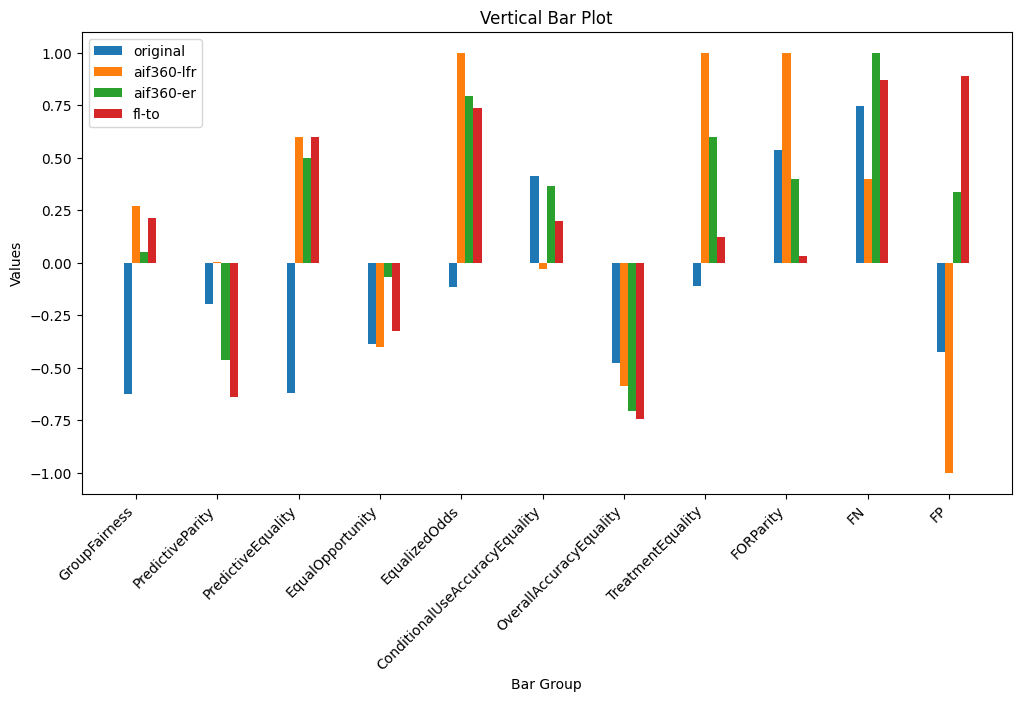

In [ ]:
grouped_bar_given_model(logistic_metrics, ["original", "aif360-lfr","aif360-er", "fl-to"])

## Preprocessing results

## NEW

Logistic Regression


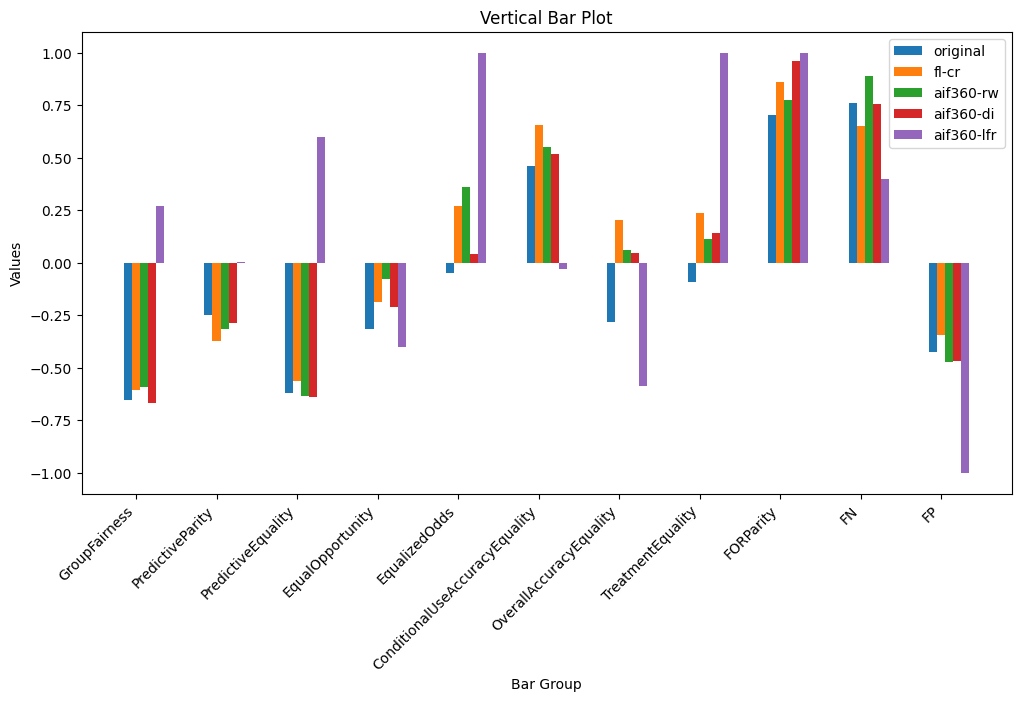

Decision Tree


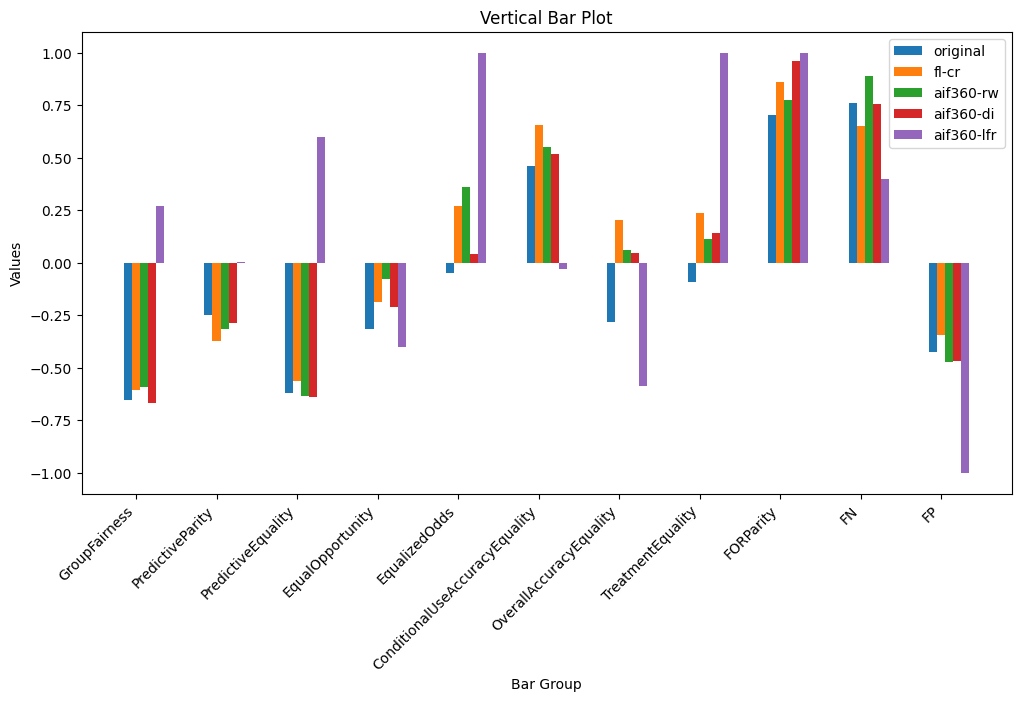

Bagging


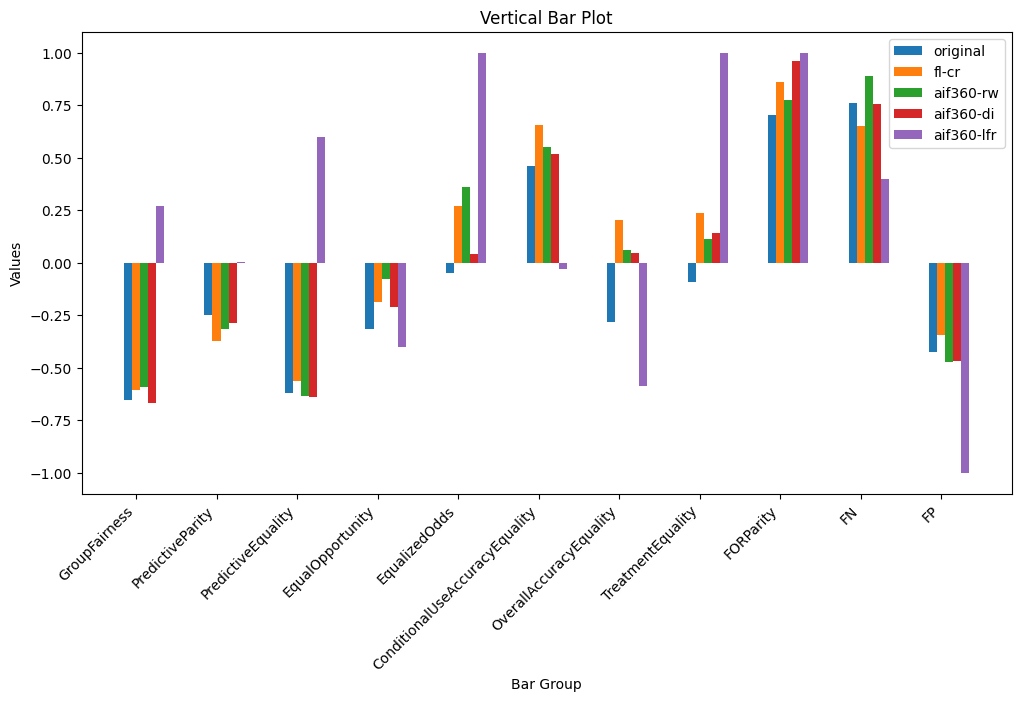

Random Forest


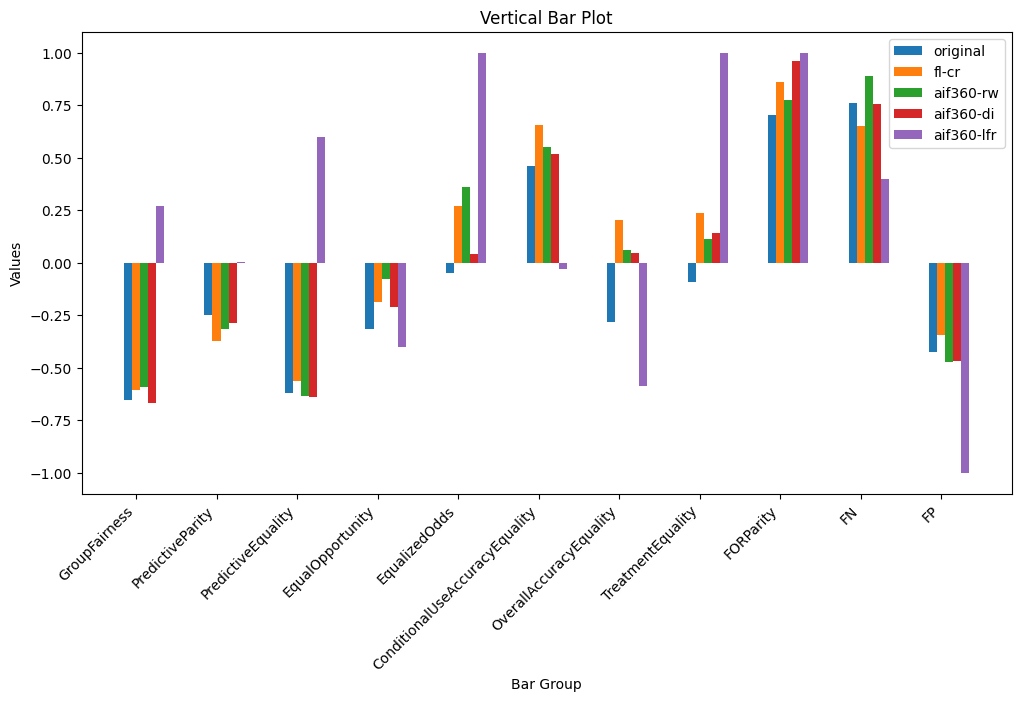

Extremely Randomized Trees


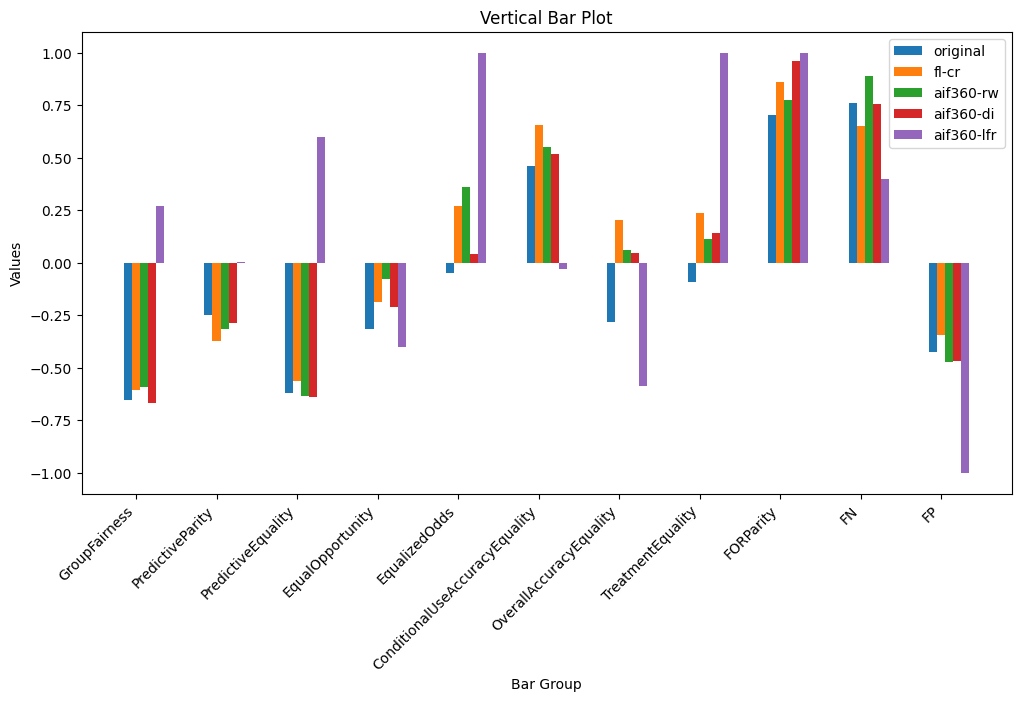

Ada Boost


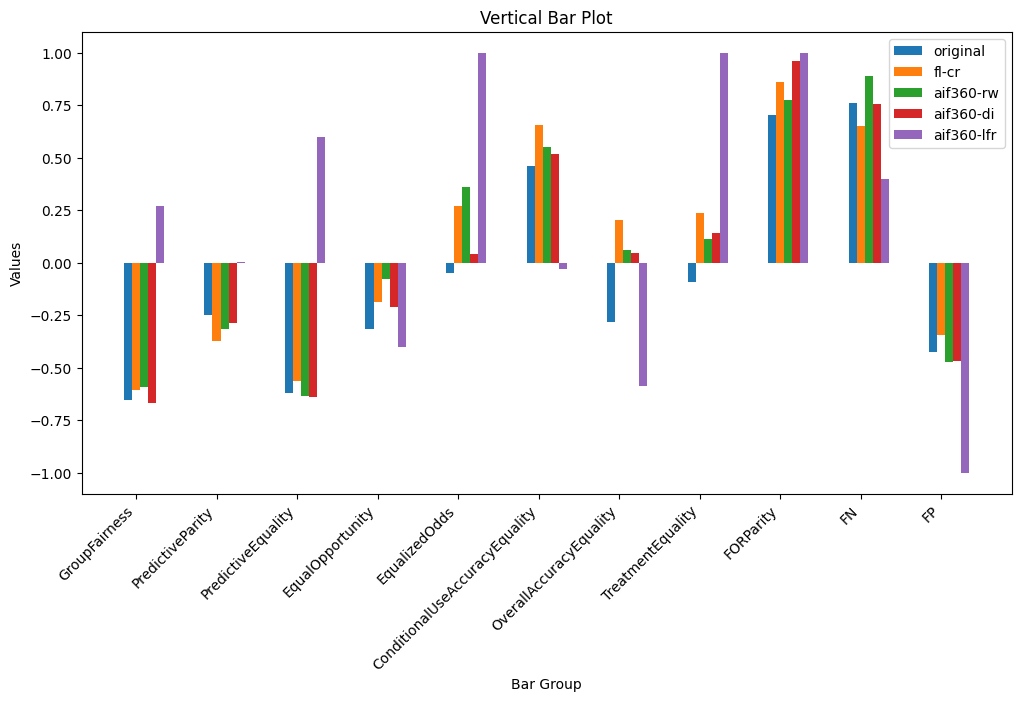

In [ ]:
for m in models:
  print(m)
  grouped_bar(overall_metrics["diabetes-women"], mitigation_list, "division", m)

### Diabetes-women, all pre-processing techniques, division, all ML models

Logistic Regression


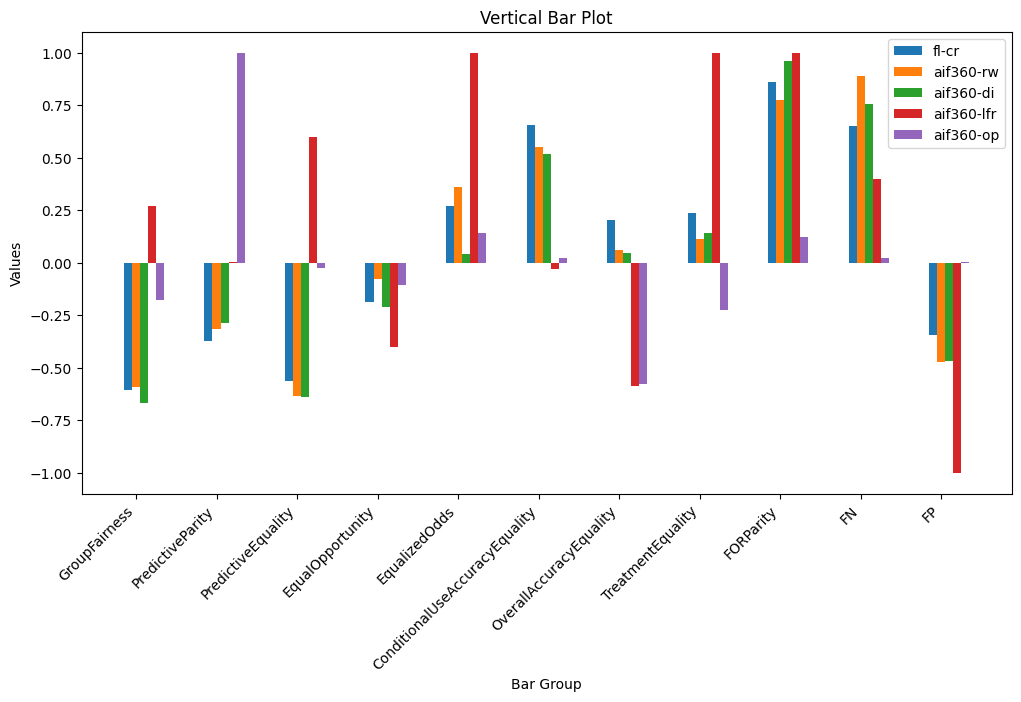

Decision Tree


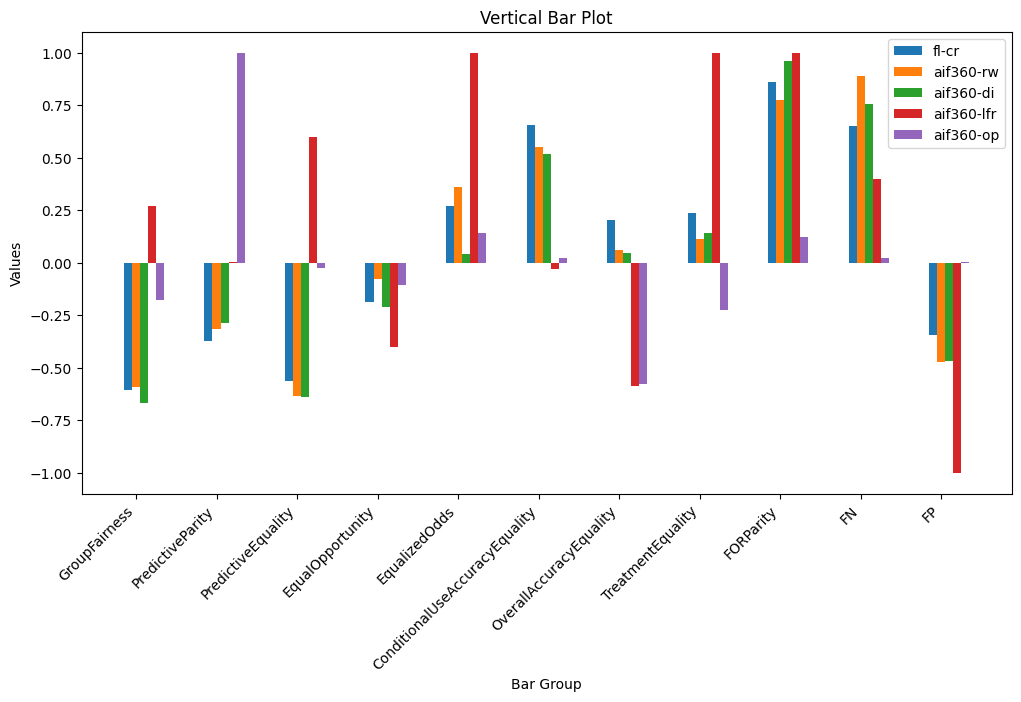

Bagging


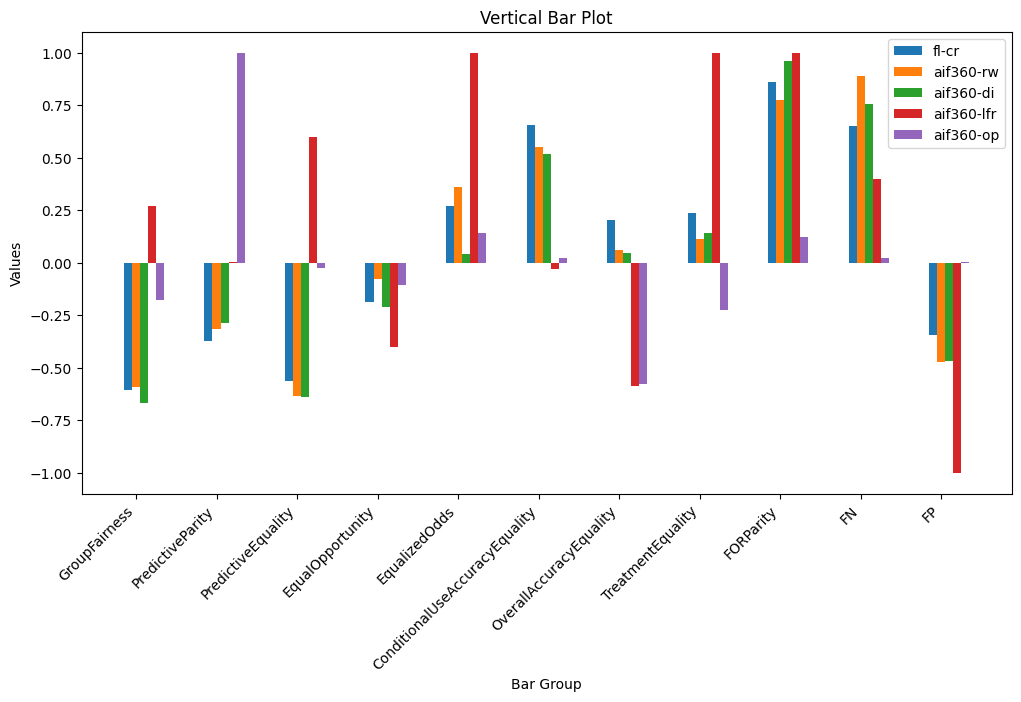

Random Forest


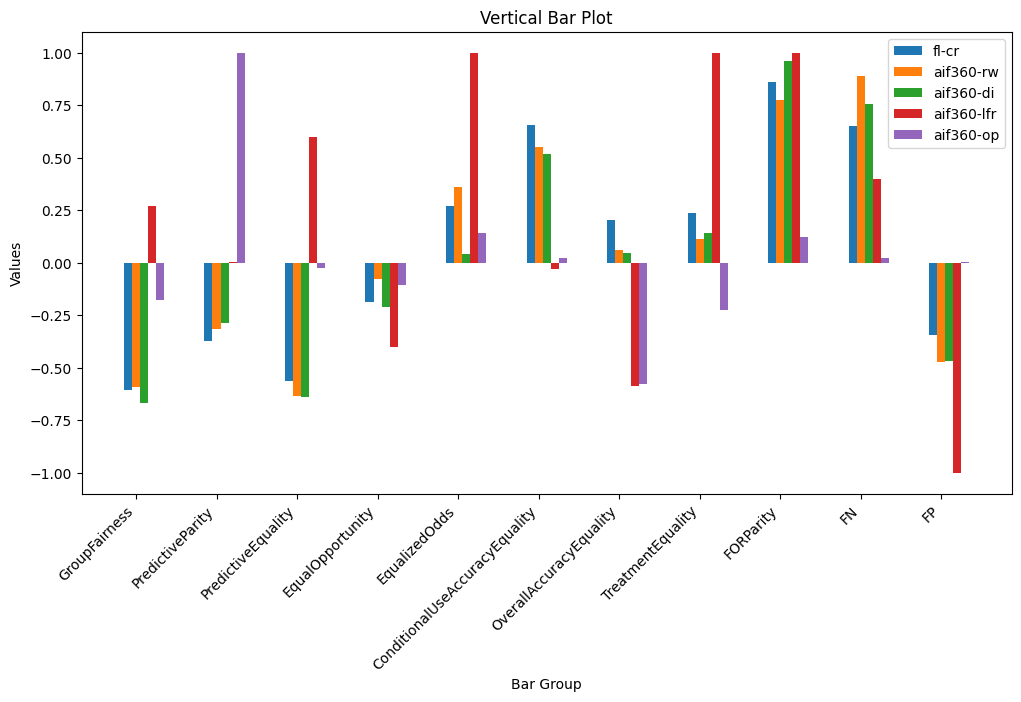

Extremely Randomized Trees


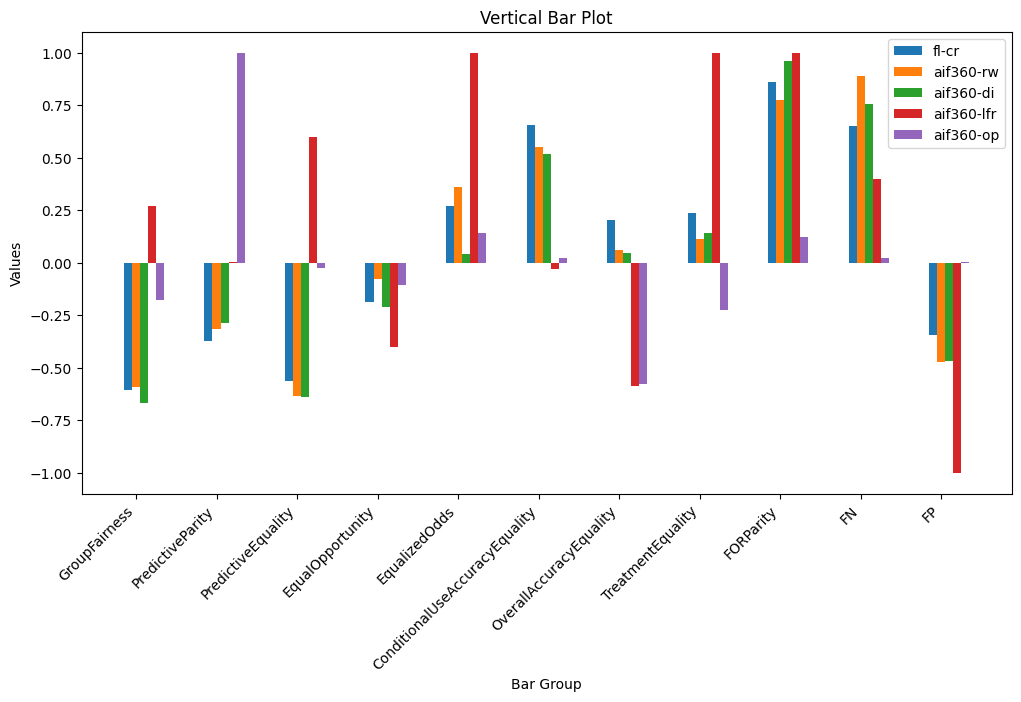

Ada Boost


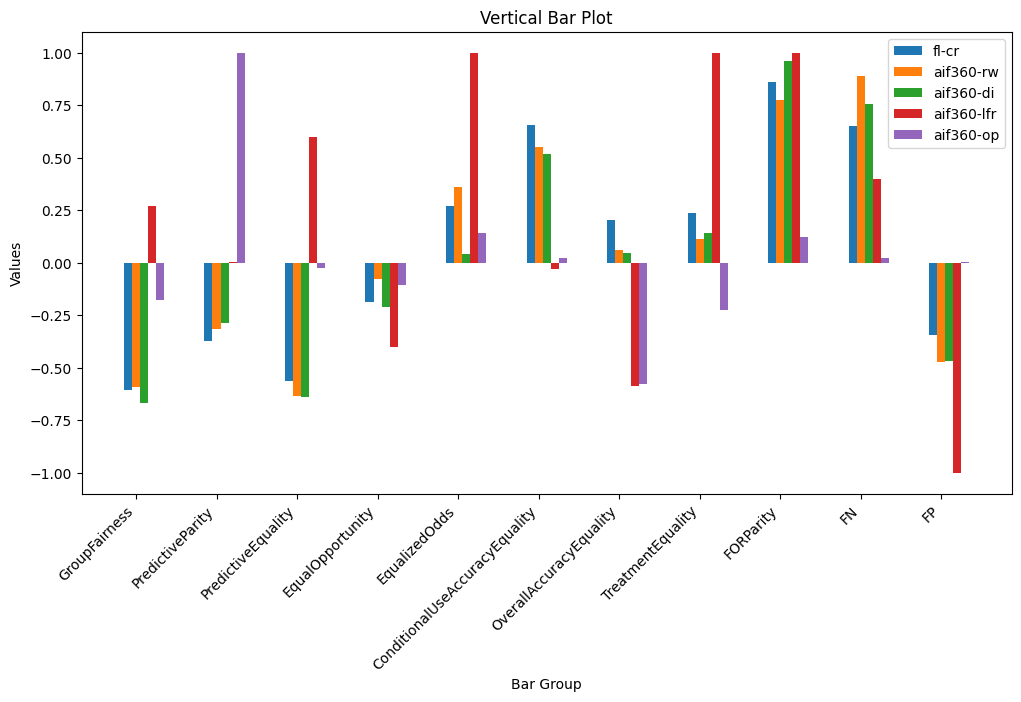

In [ ]:
for m in models:
  print(m)
  grouped_bar(preprocessing_metrics["diabetes-women"], preprocessing_mitigation_list, "division", m)

serve che tutte le metriche siano comprese tra due estremi. inoltre sarebbe bello averle centrate sullo zero, per poter fare dei radar plot relativi a ciascuna configurazione e calcolare come valore finale l'area del radar (se è possibile).

altra cosa invece carina è di prendere tutte le metriche insieme e trasformarle in un vettore: con dimenzionality reduction si può mostrare tutti gli algoritmi su un unico grafico, però bisogna stare attenti a cosa mostriamo se facciamo riduzione dei vettori a due sole dimenzioni (es. cosa significa se ci troviamo nel quadrante in alto a destra o in quello in basso a sinistra?). però una cosa interessante è vedere come i diversi algoritmi sono in relazioni tra di loro, quindi una valutazione più qualitativa che quantitativa...

altra idea: se calcolassimo una componente su un asse o su una direzione? però chissà cosa scegliere...

In [ ]:
# From a dictionary input, return a bidimensional np.array
def vectorise(dictionary, dataset, comparison, model):
  vector_l = []
  for mitigation in mitigation_list:
    l = []
    for metric in metrics:
      l.append(dictionary[dataset][mitigation][comparison][model][metric]["Value"])
    vector_l.append(l)

  vector = np.asarray(vector_l)
  return vector

In [ ]:
vectorise(overall_metrics, 'diabetes-women', "division", "Logistic Regression")

array([[ 0.16663068,  1.17482993,  0.07298077,  0.63574468,  0.03992705,
         1.47302642,  0.10267709,  0.35791721,  2.59521127,  1.77668934,
         0.10780639],
       [ 0.17098704,  1.15590659,  0.07744898,  0.64340426,  0.04277898,
         1.4480992 ,  0.10213989,  0.38440678,  2.59      ,  1.79809524,
         0.11440678],
       [ 1.01865136,  0.29142857,  1.5625    ,  1.19402985,  1.79464286,
         0.41491525,  0.13946731, 20.7804878 ,  4.57142857,  4.61971831,
         2.59756098],
       [ 0.47481939,  0.84634062,  0.47982759,  1.13696809,  0.53887447,
         1.11120911,  0.18145161,  4.2084764 ,  3.8156348 ,  3.17743764,
         0.70879603],
       [ 0.19541376,  1.01141827,  0.12908163,  0.64340426,  0.07129829,
         1.265625  ,  0.10110294,  0.64067797,  2.56666667,  1.79809524,
         0.19067797]])

PCA plot with vectors of metrics.

In [ ]:
# pca = PCA(n_components=2)
# X_r = pca.fit_transform(vectorise(overall_metrics, 'diabetes-women', "division", "Logistic Regression"))

# fig = plt.figure()
# ax = fig.add_subplot(111)
# colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:cyan']
# ax.scatter(X_r[:, 0], X_r[:, 1], color=colors)
# for i, label in enumerate(models):
#     plt.annotate(label, (X_r[:, 0][i], X_r[:, 1][i]))
# plt.show()

Transform dictionary into a dataframe.

In [ ]:
def data_framing(dictionary, dataset, comparison, model):
  # Define the columns for your DataFrame
  columns = ['Mitigation'] + metrics

  # Create an empty DataFrame with the specified columns
  data = pd.DataFrame(columns=columns)

  for mitigation in mitigation_list:
    l = []
    l.append(mitigation)
    for metric in metrics:
      l.append(dictionary[dataset][mitigation][comparison][model][metric]["Value"])
    row_df = pd.DataFrame([l], columns=columns)
    data = pd.concat([data, row_df], ignore_index=True)

  data.set_index('Mitigation', inplace=True)
  return data

In [ ]:
data_framing(overall_metrics, 'diabetes-women', "division", "Logistic Regression")

GroupFairness  PredictiveParity  PredictiveEquality  \
Mitigation                                                        
original         0.166631          1.174830            0.072981   
fl-cr            0.170987          1.155907            0.077449   
fl-to            1.018651          0.291429            1.562500   
aif360-rw        0.474819          0.846341            0.479828   
aif360-di        0.195414          1.011418            0.129082   

            EqualOpportunity  EqualizedOdds  ConditionalUseAccuracyEquality  \
Mitigation                                                                    
original            0.635745       0.039927                        1.473026   
fl-cr               0.643404       0.042779                        1.448099   
fl-to               1.194030       1.794643                        0.414915   
aif360-rw           1.136968       0.538874                        1.111209   
aif360-di           0.643404       0.071298                        1.265625   

            OverallAccuracyEquality  TreatmentEquality  FORParity        FN  \
Mitigation                                                                    
original                   0.102677           0.357917   2.595211  1.776689   
fl-cr                      0.102140           0.384407   2.590000  1.798095   
fl-to                      0.139467          20.780488   4.571429  4.619718   
aif360-rw                  0.181452           4.208476   3.815635  3.177438   
aif360-di                  0.101103           0.640678   2.566667  1.798095   

                  FP  
Mitigation            
original    0.107806  
fl-cr       0.114407  
fl-to       2.597561  
aif360-rw   0.708796  
aif360-di   0.190678

### Diabetes-women, all pre-processing techniques, subtraction, all ML models

Logistic Regression


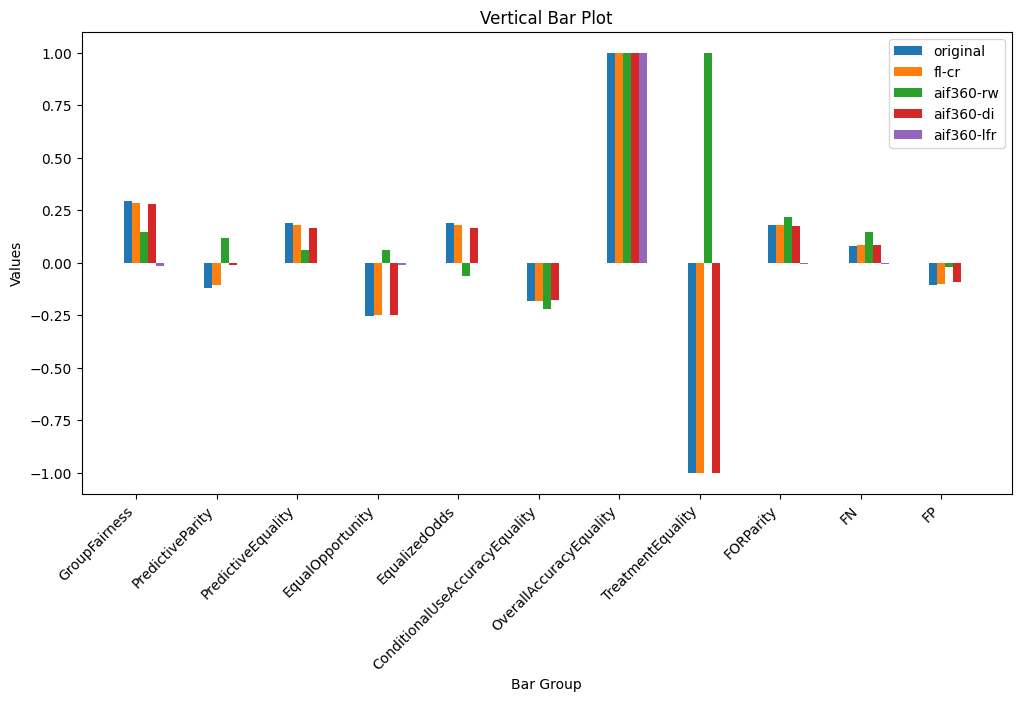

Decision Tree


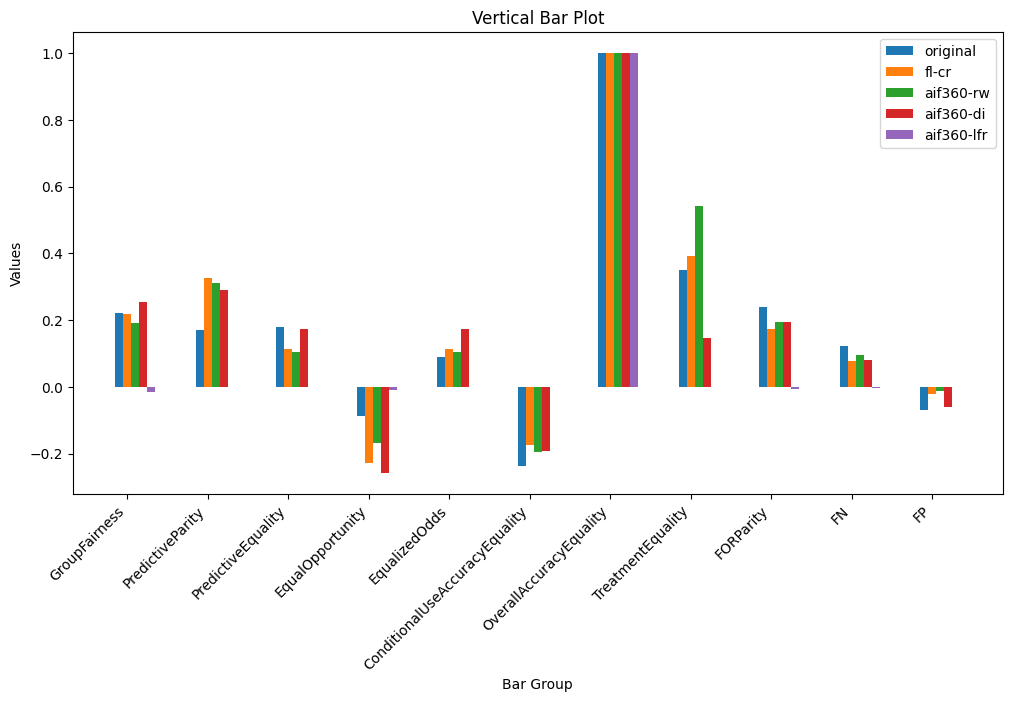

Bagging


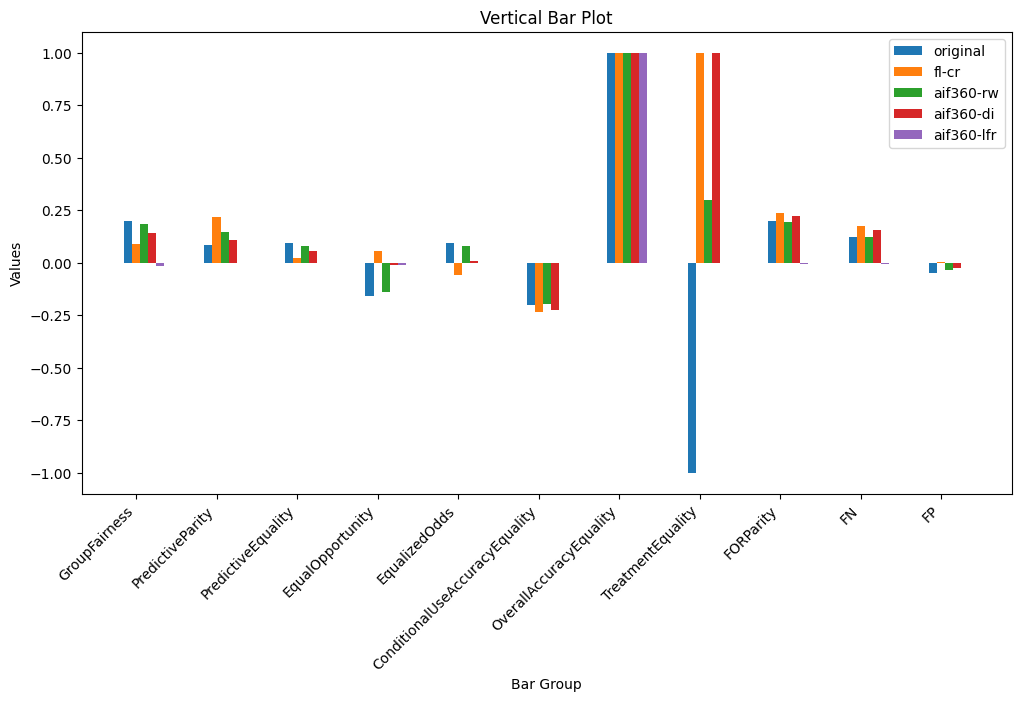

Random Forest


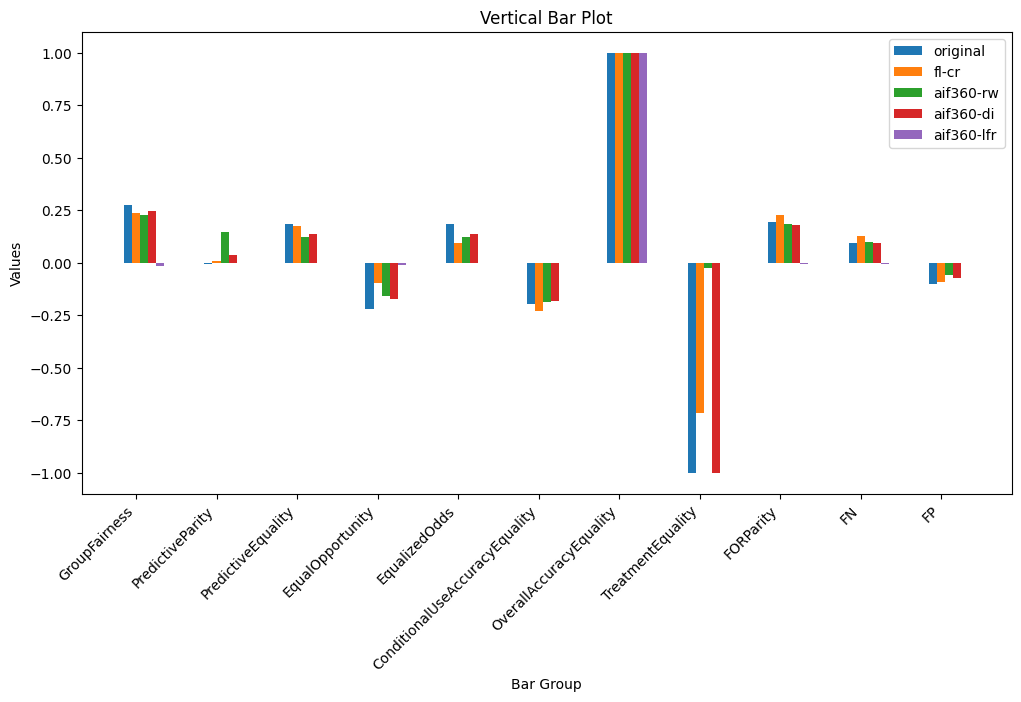

Extremely Randomized Trees


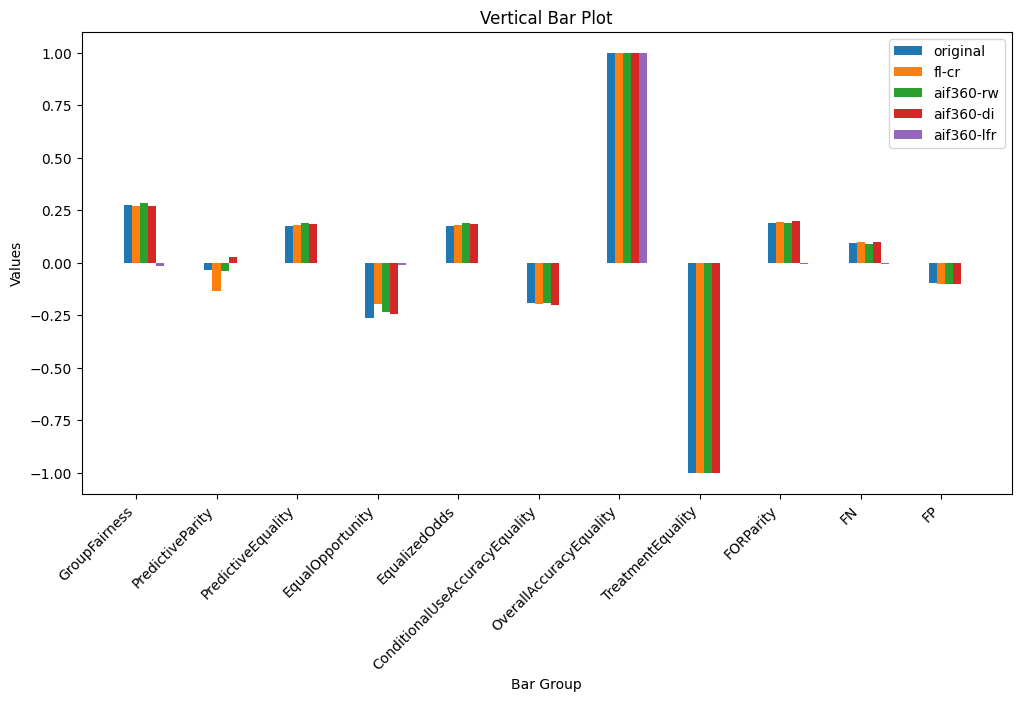

Ada Boost


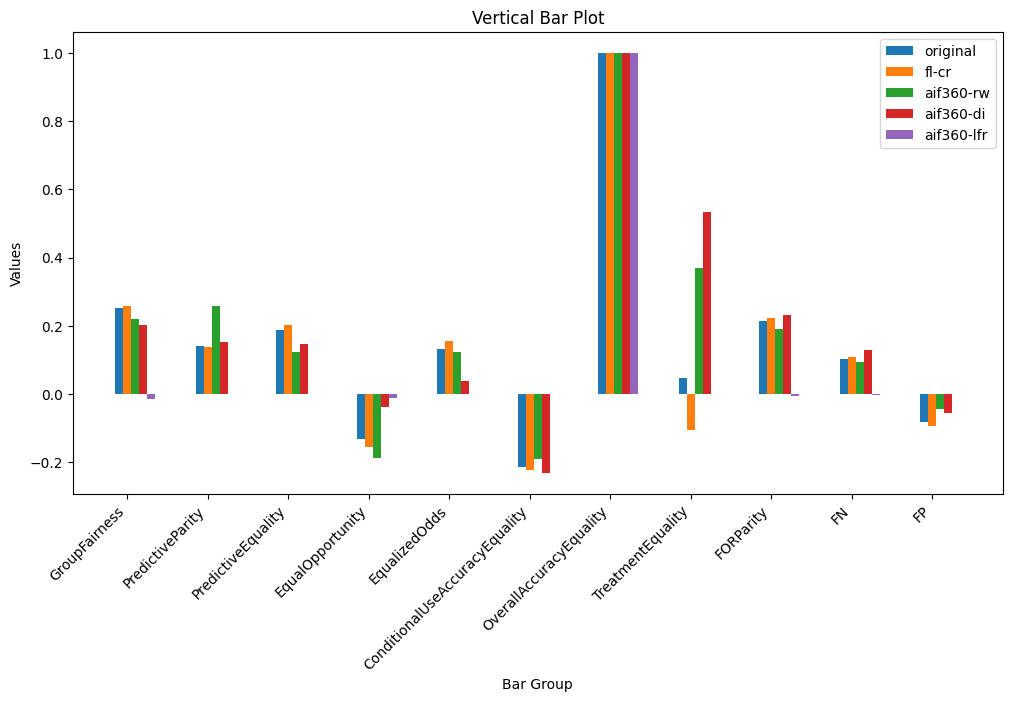

In [ ]:
for m in models:
  print(m)
  grouped_bar(preprocessing_metrics["diabetes-women"], preprocessing_mitigation_list, "subtraction", m)


## In-processing results

### NEW, two over three in-processing techniques, division

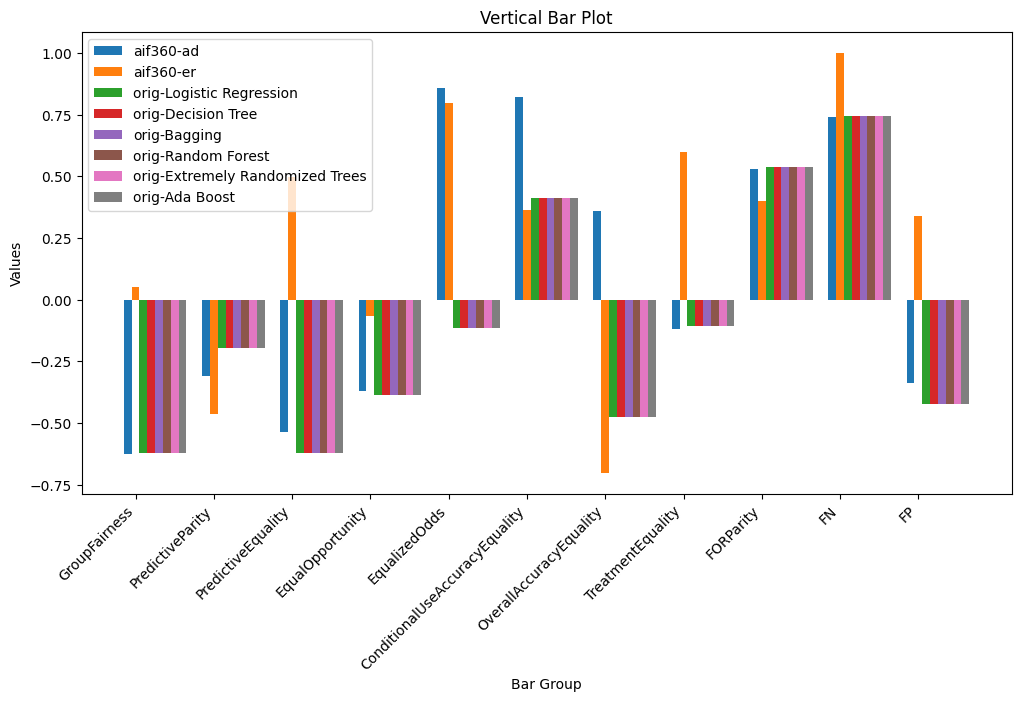

In [ ]:
grouped_bar_no_model(inprocessing_metrics["diabetes-women"], ["aif360-ad", "aif360-er", "orig-Logistic Regression", "orig-Decision Tree", "orig-Bagging", "orig-Random Forest", 'orig-Extremely Randomized Trees', 'orig-Ada Boost'], "division")

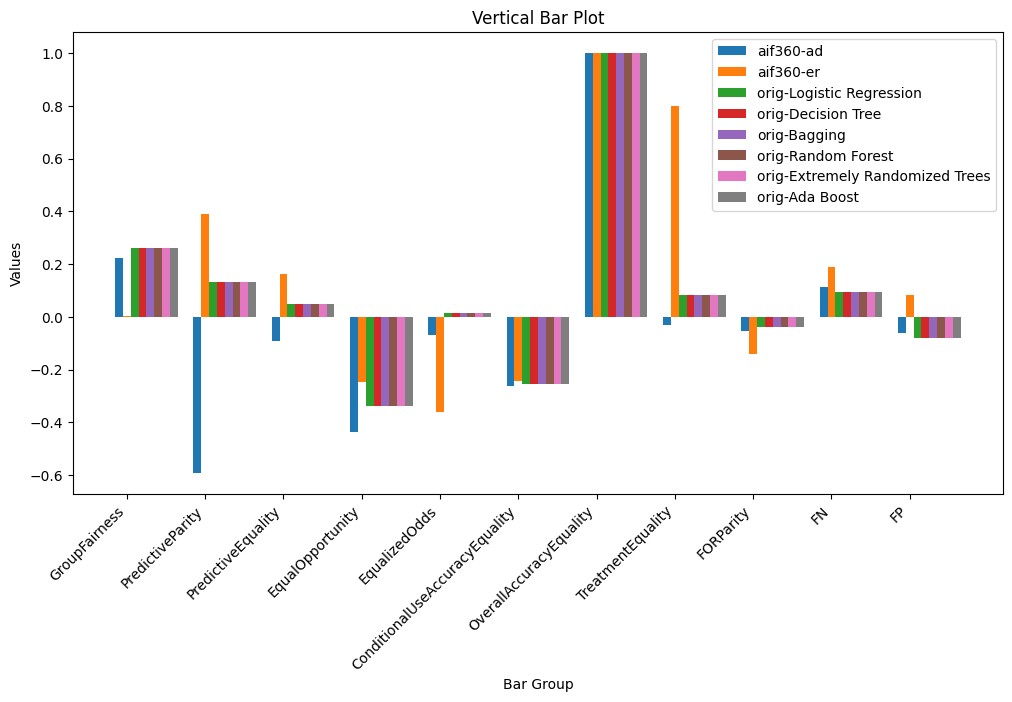

In [ ]:
grouped_bar_no_model(inprocessing_metrics["diabetes-women"], ["aif360-ad", "aif360-er", "orig-Logistic Regression", "orig-Decision Tree", "orig-Bagging", "orig-Random Forest", 'orig-Extremely Randomized Trees', 'orig-Ada Boost'], "subtraction")

### Diabetes-women, two over three in-processing techniques, division, no ML models

In [ ]:
for m in models:
  inprocessing_mitigation_list.append('orig-'+str(m))

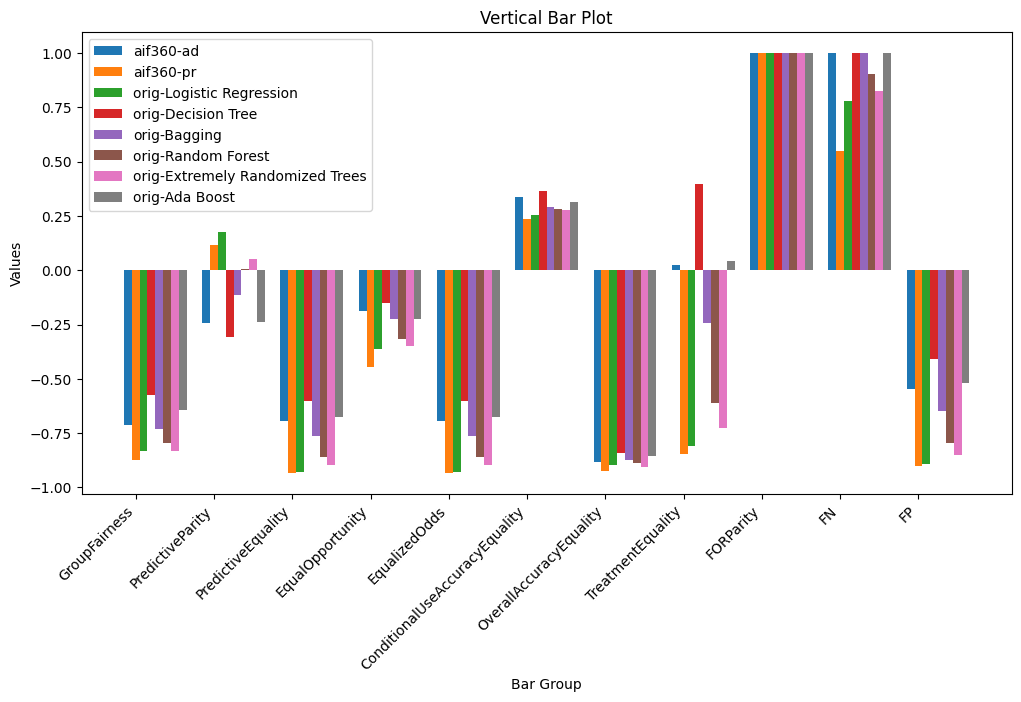

In [ ]:
grouped_bar_no_model(inprocessing_metrics["diabetes-women"], inprocessing_mitigation_list, "division")

### Diabetes-women, two over three in-processing techniques, subtraction, no ML models

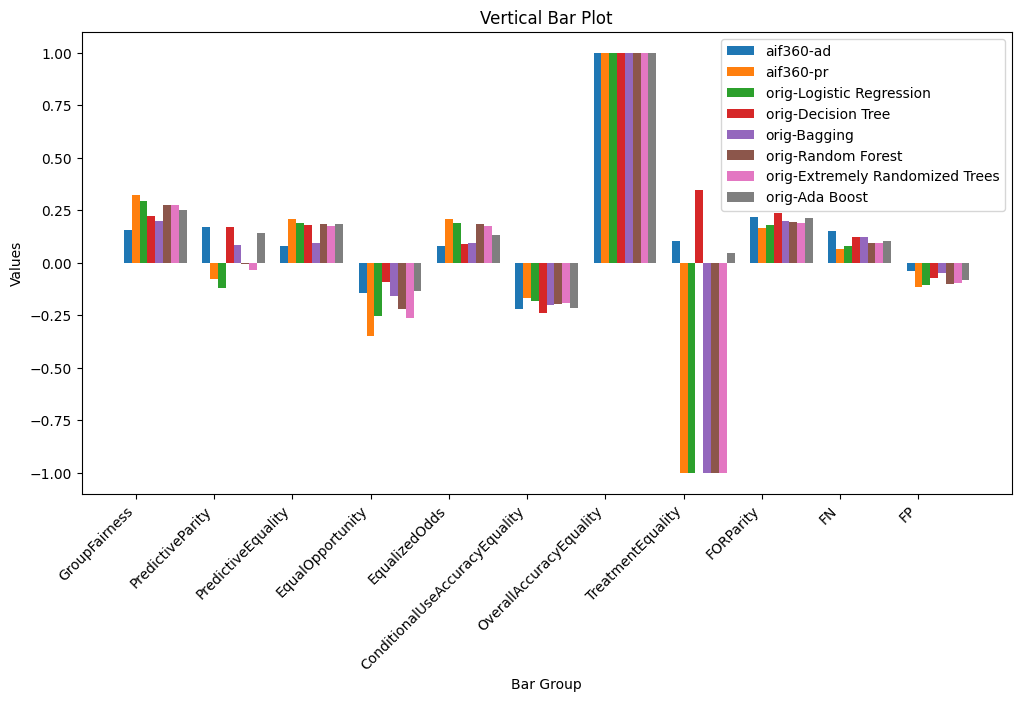

In [ ]:
grouped_bar_no_model(inprocessing_metrics["diabetes-women"], inprocessing_mitigation_list, "subtraction")

## Post-processing results

### NEW


In [ ]:
for m in models:
  for i in ['original','aif360-roc', 'aif360-ce', 'fl-to']:
    print(m, i, postprocessing_metrics["diabetes-women"][i]['division'][m])

Logistic Regression original {'GroupFairness': [-0.6223937180434952, 0.12331033651078542], 'PredictiveParity': [-0.1957643745143745, 0.4705467897426429], 'PredictiveEquality': [-0.6213500291131869, 0.22526284695299018], 'EqualOpportunity': [-0.38721595655806185, 0.37259227759855174], 'EqualizedOdds': [-0.11446210222526014, 0.6641069025202021], 'ConditionalUseAccuracyEquality': [0.4126926133535031, 0.22411688876517546], 'OverallAccuracyEquality': [-0.47720432345432345, 0.5910581507049526], 'TreatmentEquality': [-0.10770502645502641, 0.8097181200134902], 'FORParity': [0.5370861937452326, 0.7818293870366152], 'FN': [0.7462099483204134, 0.42021141054226924], 'FP': [-0.42322332748446917, 0.3419159364356519]}
Logistic Regression aif360-roc {'GroupFairness': [-0.6466365899942497, 0.1630922388309566], 'PredictiveParity': [0.0, 0.0], 'PredictiveEquality': [1.0, 0.0], 'EqualOpportunity': [-1.0, 0.0], 'EqualizedOdds': [1.0, 0.0], 'ConditionalUseAccuracyEquality': [0.0, 0.0], 'OverallAccuracyEqual

Logistic Regression


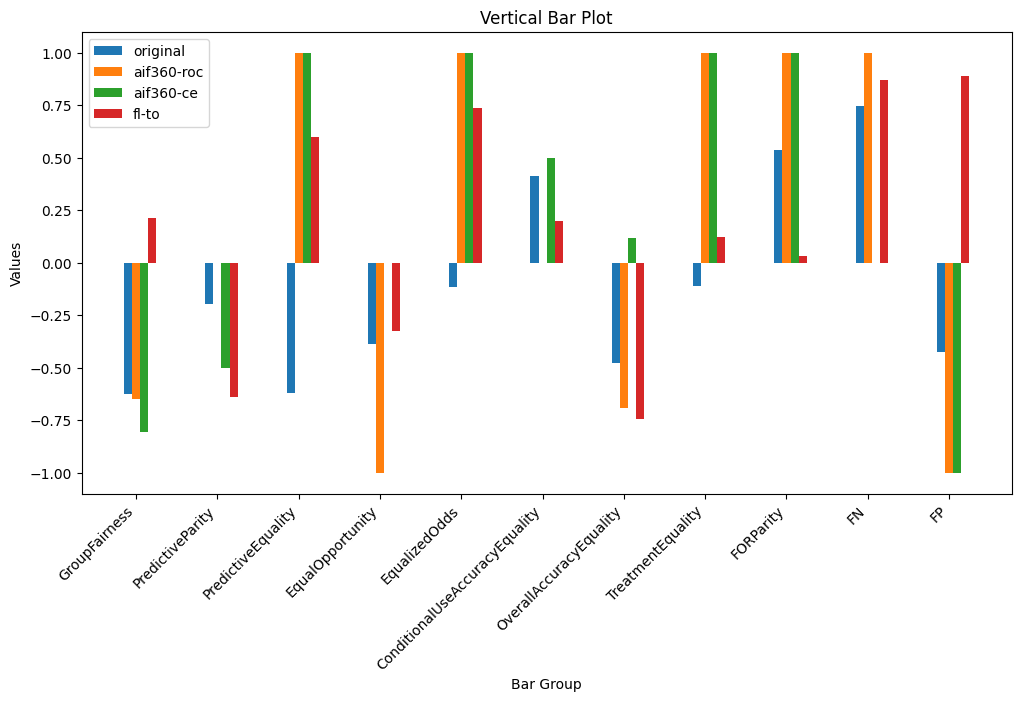

Decision Tree


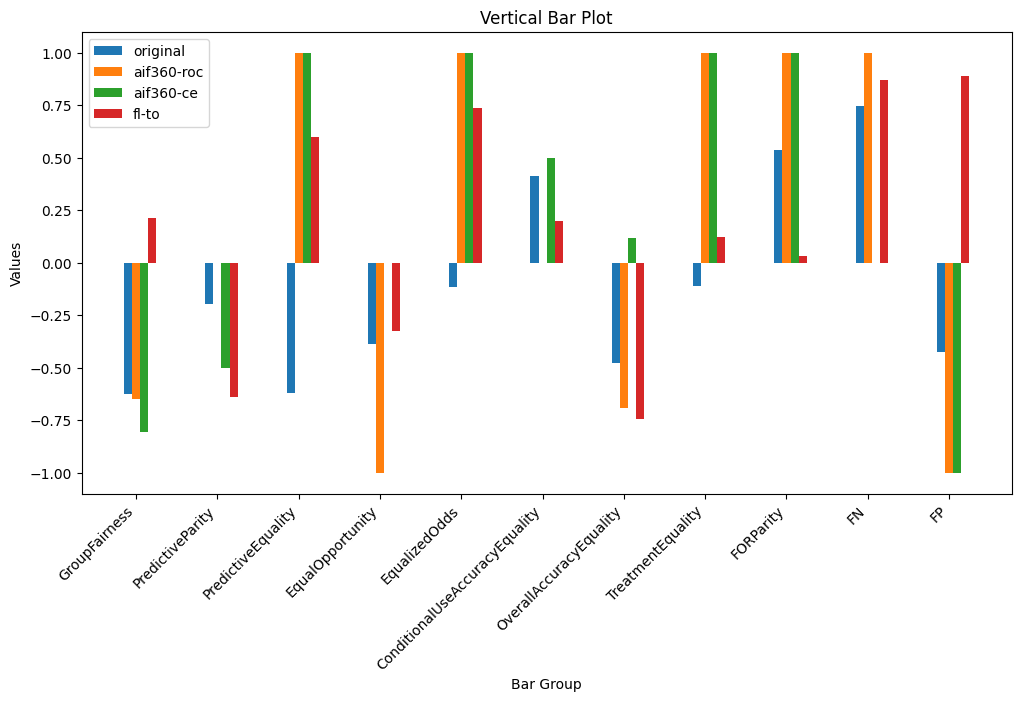

Bagging


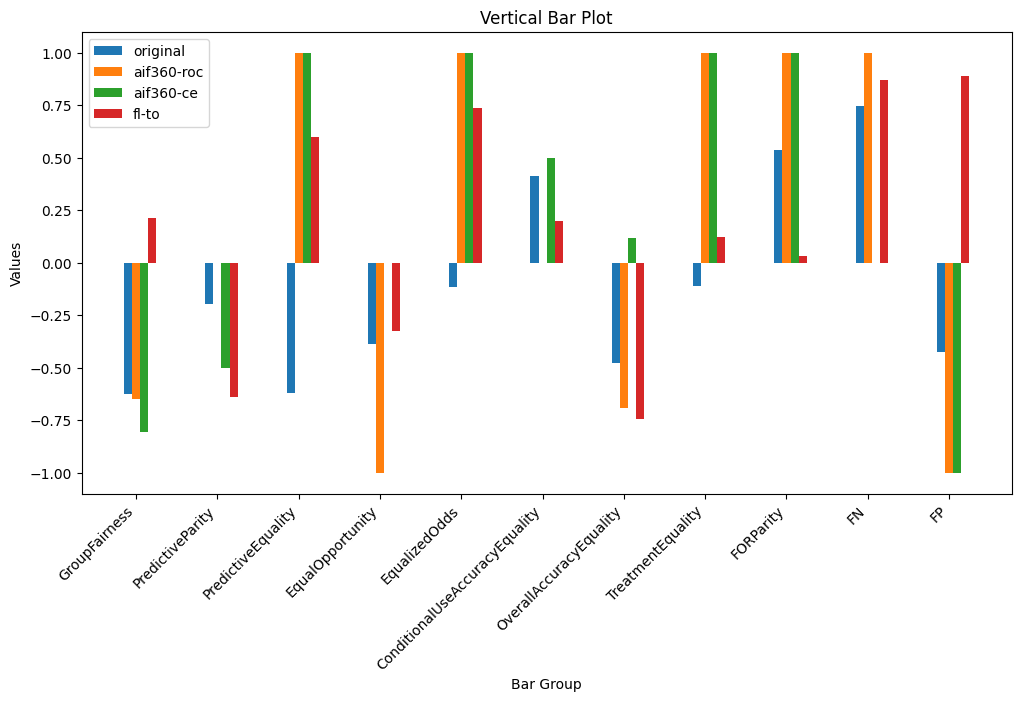

Random Forest


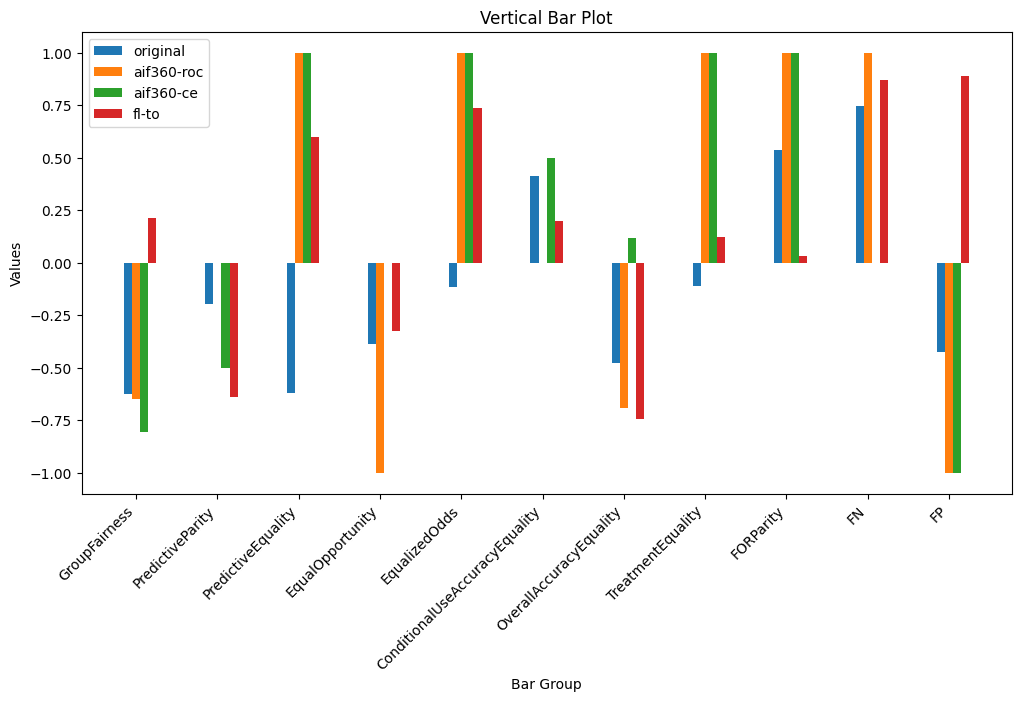

Extremely Randomized Trees


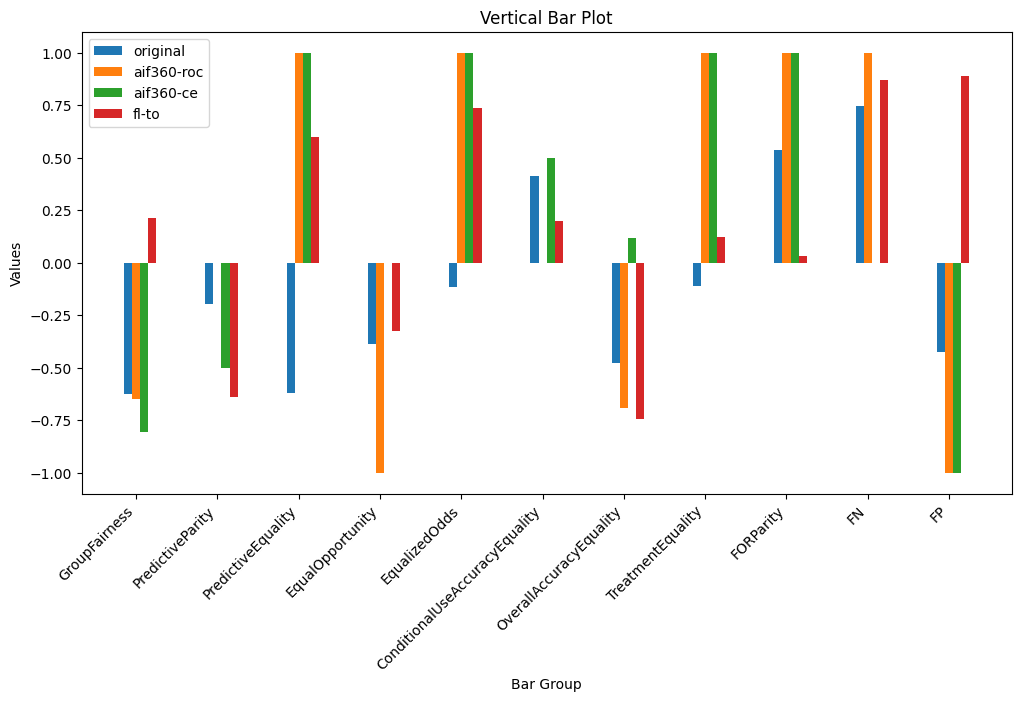

Ada Boost


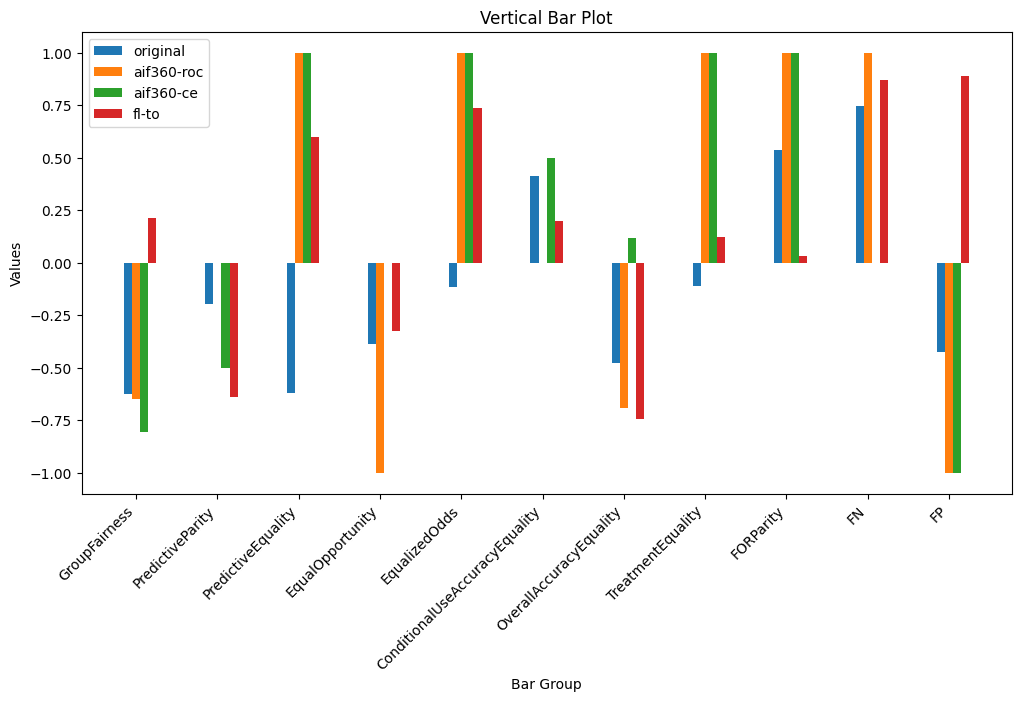

In [ ]:
for m in models:
  print(m)
  grouped_bar(postprocessing_metrics["diabetes-women"], ['original','aif360-roc', 'aif360-ce', 'fl-to'], "division", m)

Logistic Regression


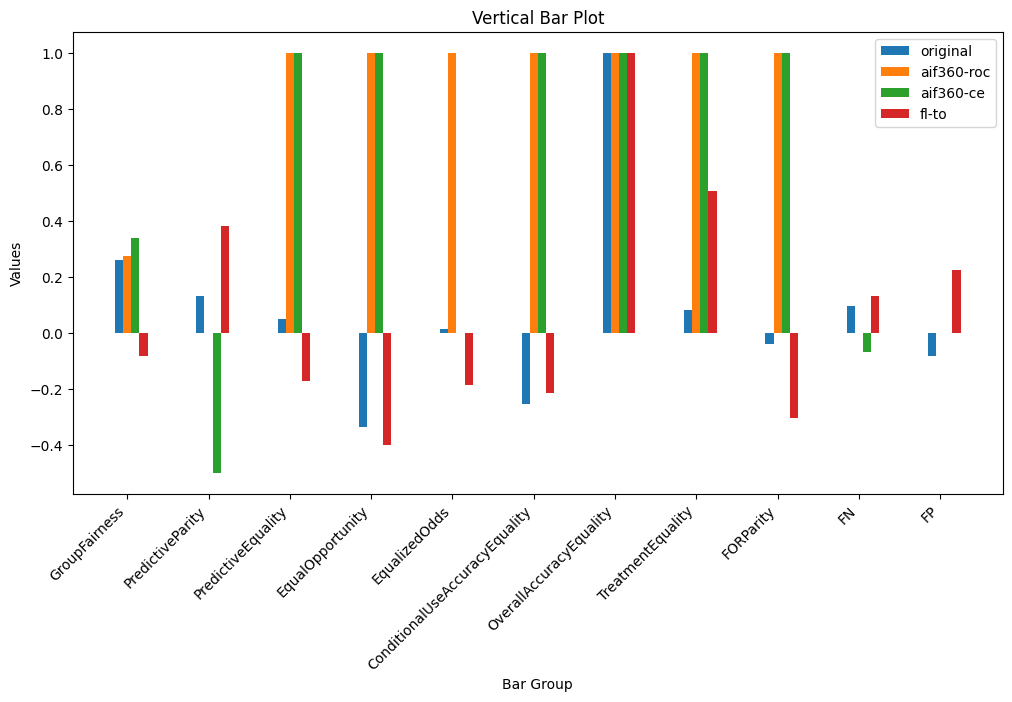

Decision Tree


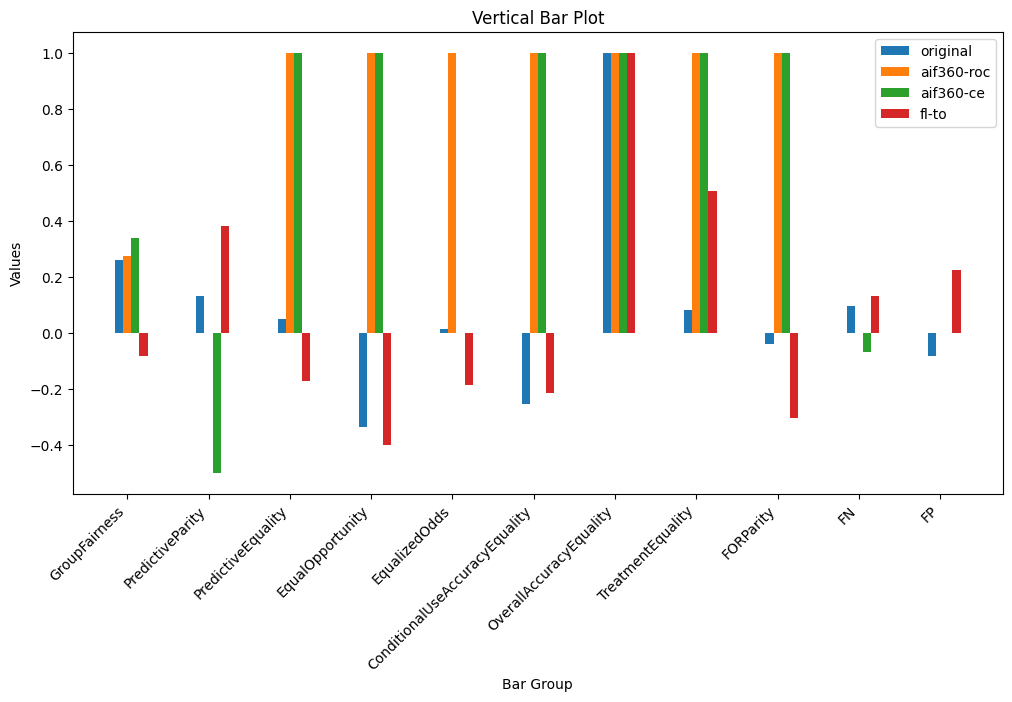

Bagging


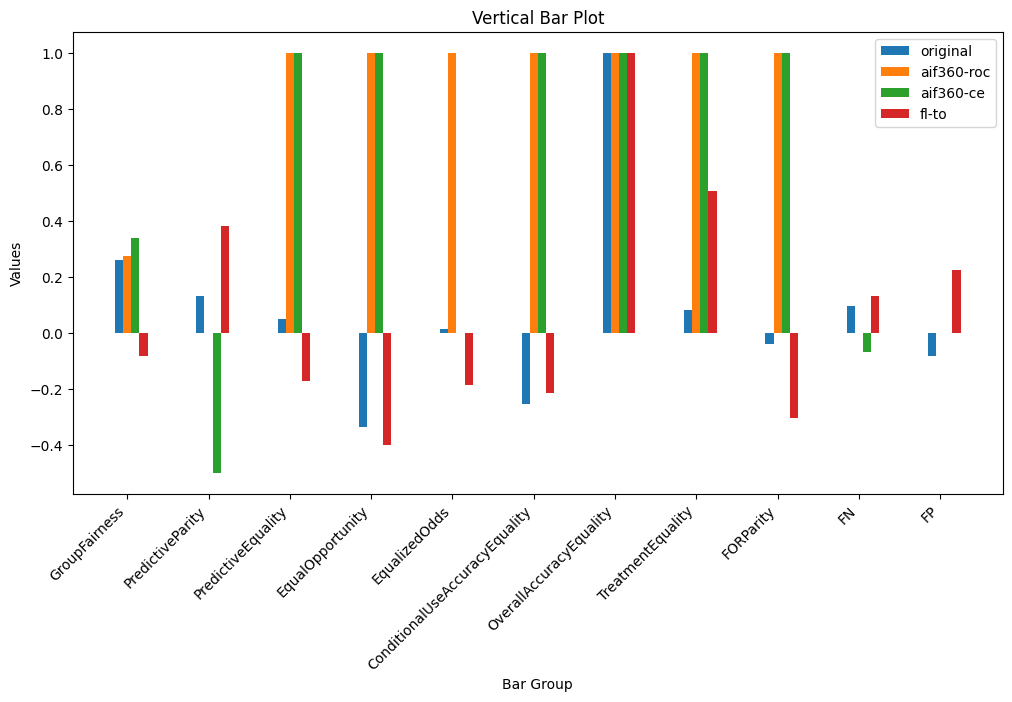

Random Forest


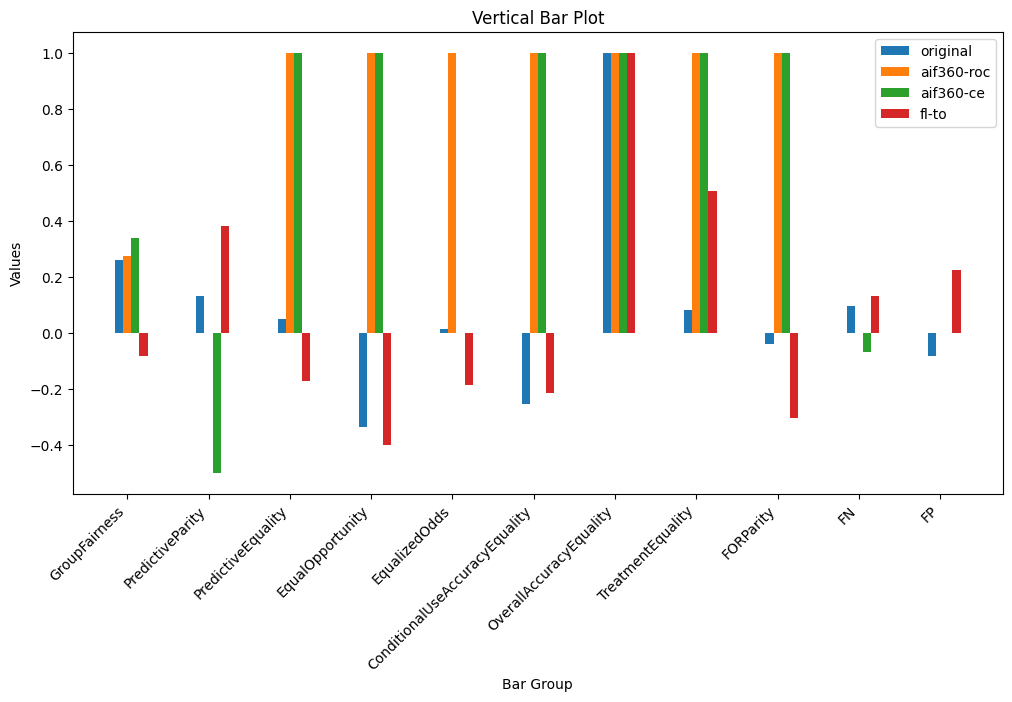

Extremely Randomized Trees


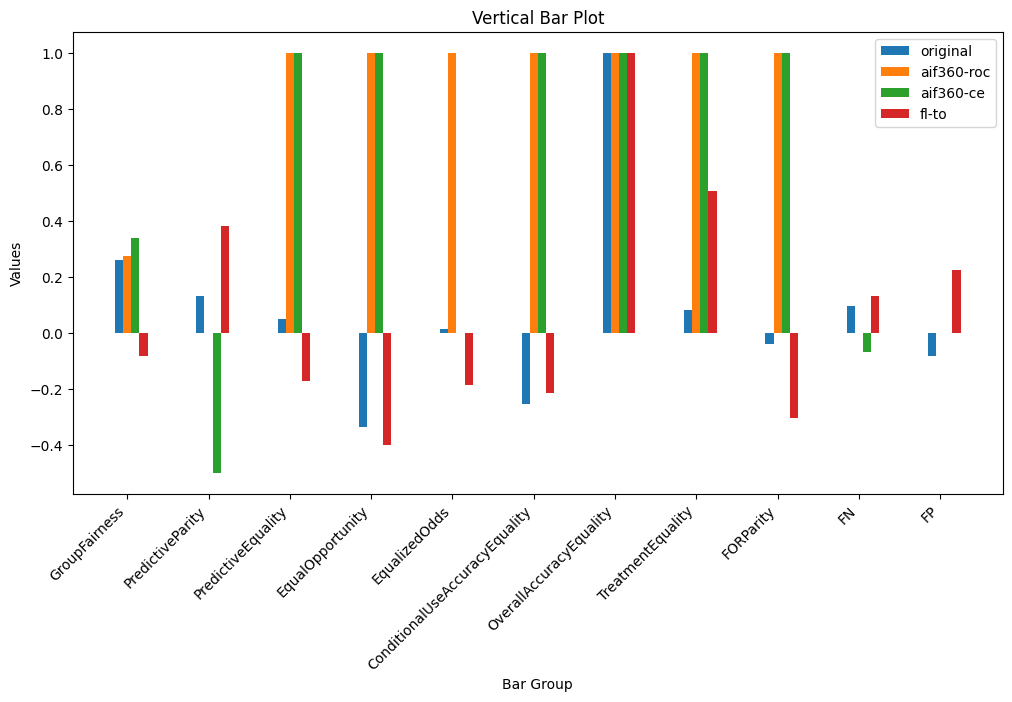

Ada Boost


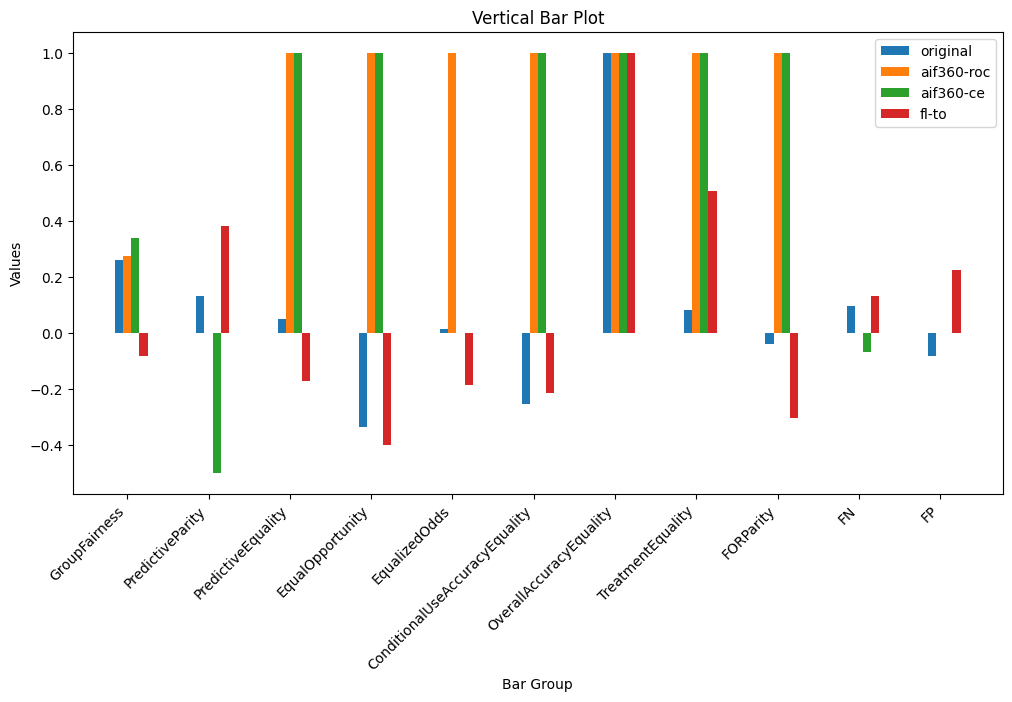

In [ ]:
for m in models:
  print(m)
  grouped_bar(postprocessing_metrics["diabetes-women"], ['original','aif360-roc', 'aif360-ce', 'fl-to'], "subtraction", m)

### Diabetes-women, post-processing techniques, division, ML models

In [ ]:
postprocessing_metrics["diabetes-women"]

{'original': {'division': {'Logistic Regression': {'GroupFairness': {'Value': -0.8333693187952067,
     'Discr_group': 0.059322033898305086,
     'Priv_group': 0.35600907029478457},
    'PredictiveParity': {'Value': 0.17482993197278907,
     'Discr_group': 0.7857142857142857,
     'Priv_group': 0.6687898089171974},
    'PredictiveEquality': {'Value': -0.9270192307692308,
     'Discr_group': 0.015,
     'Priv_group': 0.20553359683794467},
    'EqualOpportunity': {'Value': -0.36425531914893616,
     'Discr_group': 0.6944444444444444,
     'Priv_group': 0.44148936170212766},
    'EqualizedOdds': {'Value': -0.9270192307692308,
     'Discr_group': 0.5470899470899472,
     'Priv_group': 0.07298076923076922},
    'ConditionalUseAccuracyEquality': {'Value': 0.253820985164269,
     'Discr_group': 1.174829931972789,
     'Priv_group': 1.253820985164269},
    'OverallAccuracyEquality': {'Value': -0.8952380952380953,
     'Discr_group': 0.10476190476190476,
     'Priv_group': 0.9800995024875622},


Logistic Regression


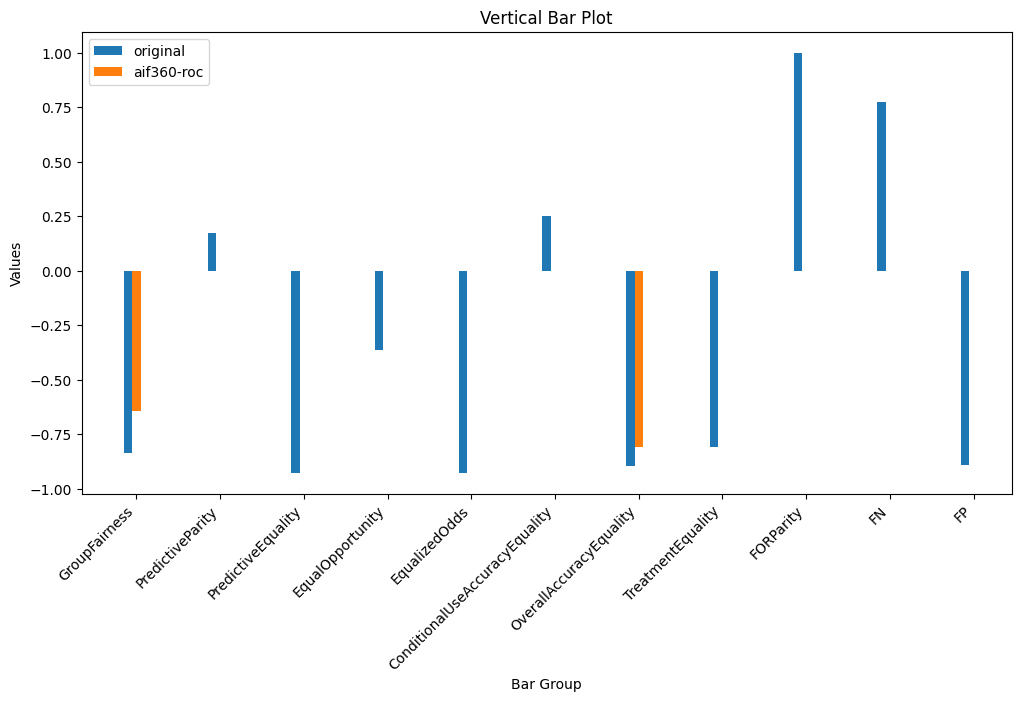

Decision Tree


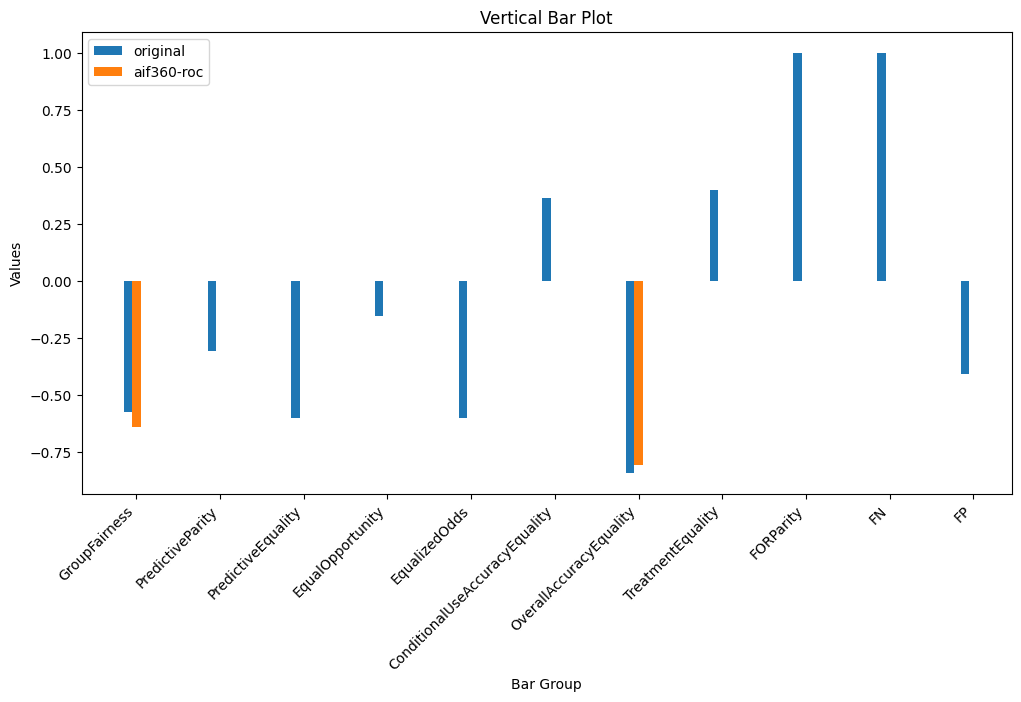

Bagging


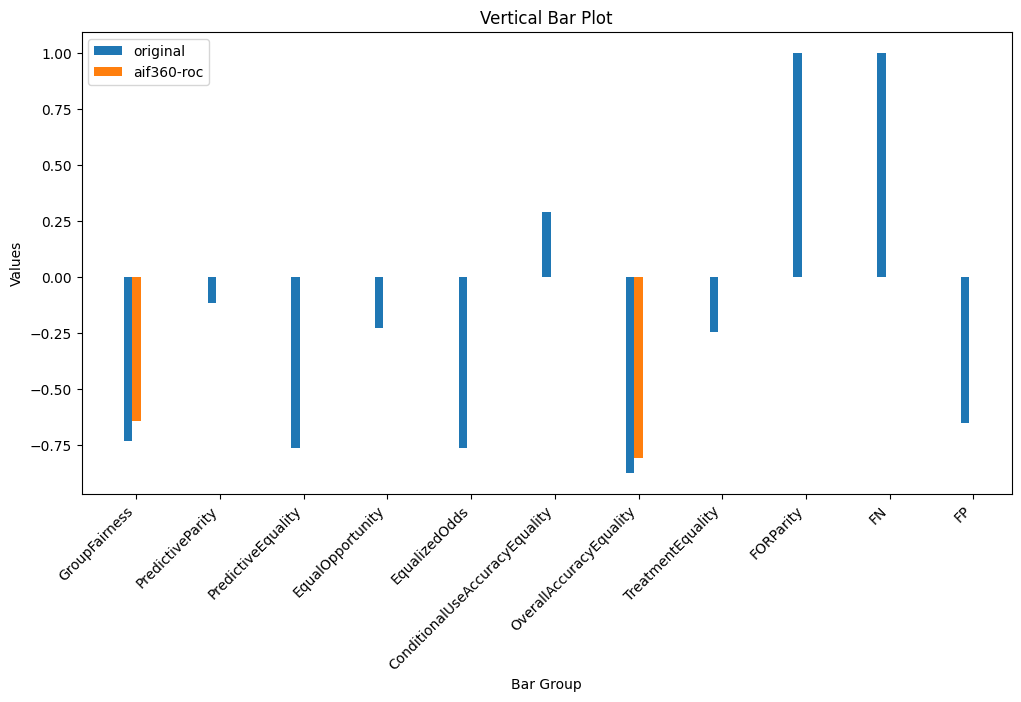

Random Forest


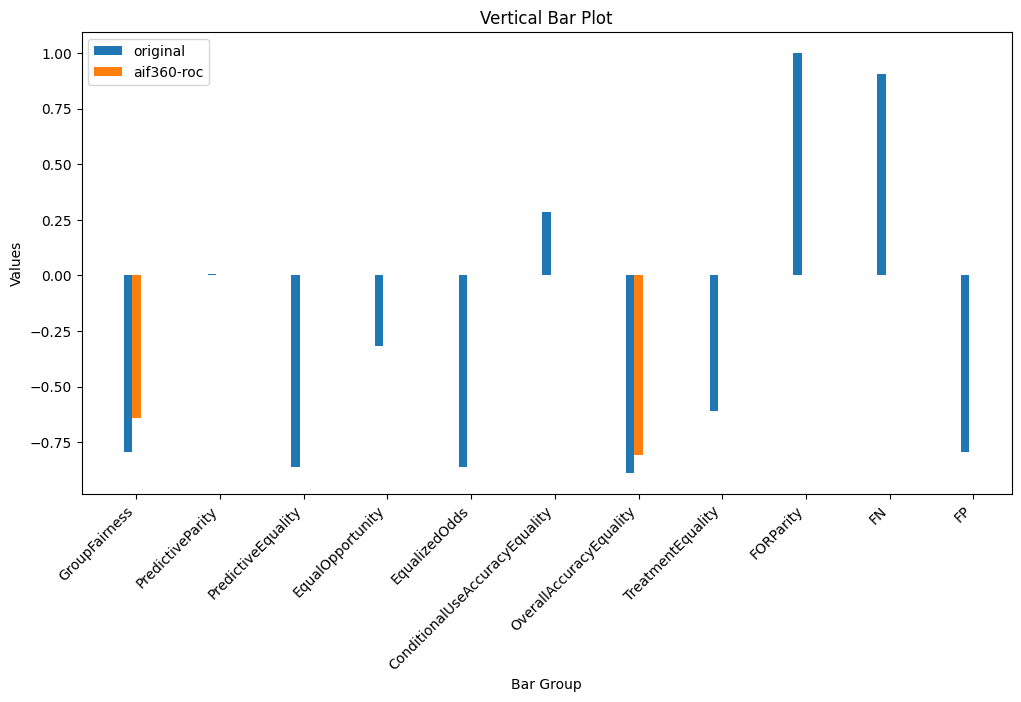

Extremely Randomized Trees


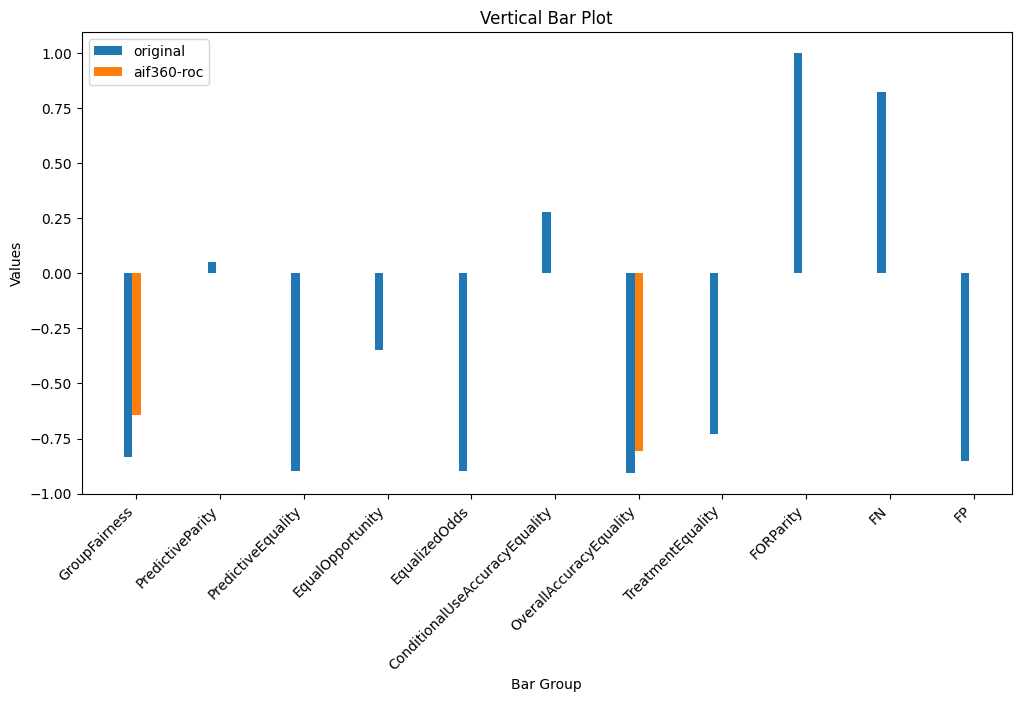

Ada Boost


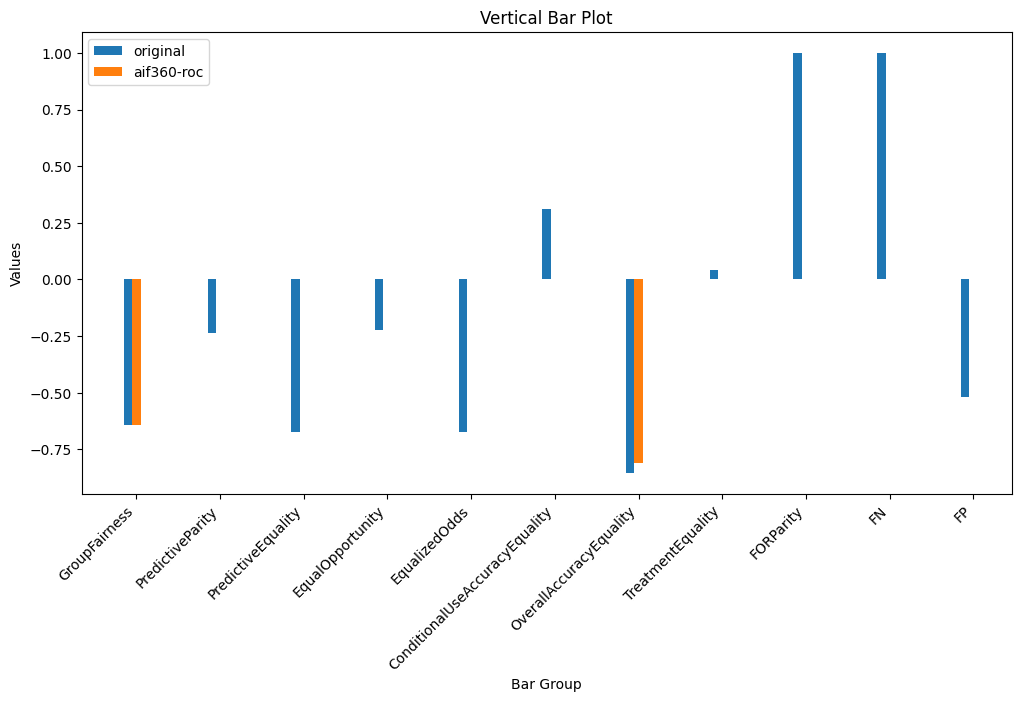

In [ ]:
for m in models:
  print(m)
  grouped_bar(postprocessing_metrics["diabetes-women"], postprocessing_mitigation_list, "division", m)

### Diabetes-women, post-processing techniques, subtraction, no ML models

## PCA alternative plot, with baseline evidenced.

Distance between fl-cr and original: 0.03396420424596163
Distance between fl-to and original: 21.05935317188484
Distance between aif360-rw and original: 4.431185358604467
Distance between aif360-di and original: 0.3086045868864181


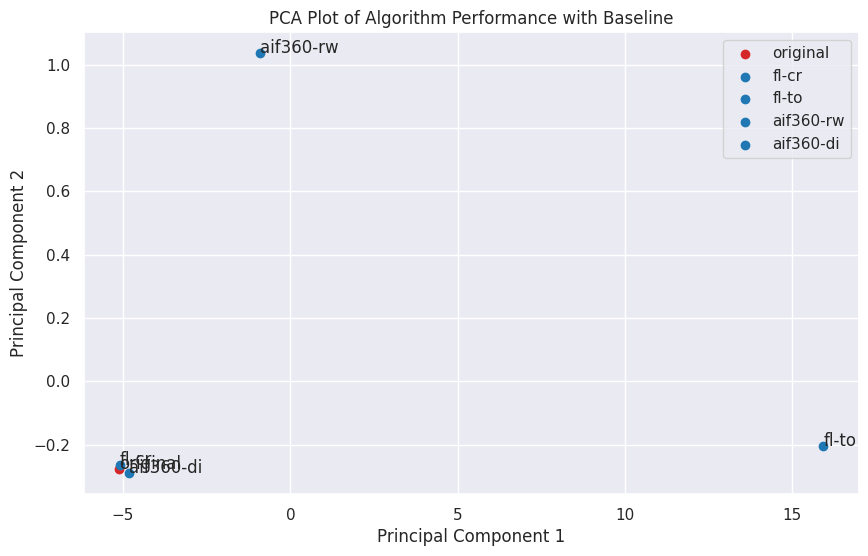

In [ ]:
# Load the data
data = data_framing(overall_metrics, 'diabetes-women', "division", "Logistic Regression")

pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)

# Select a baseline
baseline_algorithm = 'original'
baseline_index = data.index.get_loc(baseline_algorithm)

# Create a scatter plot
plt.figure(figsize=(10, 6))

for i, algorithm in enumerate(data.index):
    if algorithm == baseline_algorithm:
        plt.scatter(principal_components[i, 0], principal_components[i, 1], c='tab:red', label=algorithm)
    else:
        plt.scatter(principal_components[i, 0], principal_components[i, 1], c='tab:blue', label=algorithm)

# Annotate points with names
for i, algorithm in enumerate(data.index):
    plt.annotate(algorithm, (principal_components[i, 0], principal_components[i, 1]))

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot of Algorithm Performance with Baseline')

# Add legend
plt.legend()

# TO DO: Distances should be calculated before the PCA
for i, algorithm in enumerate(data.index):
    if algorithm != baseline_algorithm:
        distance = euclidean(principal_components[i], principal_components[baseline_index])
        print(f"Distance between {algorithm} and {baseline_algorithm}: {distance}")

plt.show()

T-SNE experiment alternative to PCA.

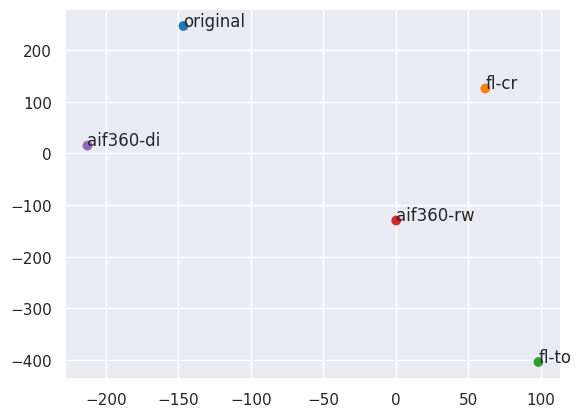

In [ ]:
tsne = TSNE(n_components=2, perplexity=3)
X_r = tsne.fit_transform(vectorise(overall_metrics, 'diabetes-women', "division", "Logistic Regression"))

fig = plt.figure()
ax = fig.add_subplot(111)
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']#,'tab:cyan']
ax.scatter(X_r[:, 0], X_r[:, 1], color=colors)
for i, label in enumerate(mitigation_list):
    plt.annotate(label, (X_r[:, 0][i], X_r[:, 1][i]))
plt.show()

#Heatmaps

In [ ]:
# Aggregation of metrics
def aggregate_all(metrics_dictionary, dataset, mitigation, comparison, model):
  l = []
  for metric in metrics:
    l.append(metrics_dictionary[dataset][mitigation][comparison][model][metric]["Value"])
  return np.mean(l), np.std(l)

In [ ]:
# TO DO questo richiede chiaramente che le misure vengano in qualche modo normalizzate o stiano tutte entro lo stesso intervallo e con significati quantitativi simili -> DIFFICILE
aggregate_all(overall_metrics, 'diabetes-women', 'original', "division", "Logistic Regression")

(0.773040075484052, 0.8233747180135076)

In [ ]:
# Aggregation of metrics by family
def fine_aggregation(metrics_dictionary, dataset, mitigation, comparison, model):
  groups = {'metrics_on_results': ['GroupFairness'],
            'metrics_on_FP': ['PredictiveParity', 'PredictiveEquality', 'FP'],
            'metrics_on_FN': ['EqualOpportunity', 'FORParity', 'FN'],
            'metrics_on_all': ['TreatmentEquality', 'EqualizedOdds', 'ConditionalUseAccuracyEquality', 'OverallAccuracyEquality']
            }

  aggregated_metrics = {}
  for k in groups.keys():
    support = []
    for metric in groups[k]:
      support.append(metrics_dictionary[dataset][mitigation][comparison][model][metric]["Value"])
    aggregated_metrics[k] = np.array([np.mean(support), np.std(support)])

  return aggregated_metrics

In [ ]:
fine_aggregation(overall_metrics, 'diabetes-women', 'original', "division", "Logistic Regression")

{'metrics_on_results': array([0.16663068, 0.        ]),
 'metrics_on_FP': array([0.45187236, 0.51140587]),
 'metrics_on_FN': array([1.6692151, 0.8035506]),
 'metrics_on_all': array([0.49338694, 0.57799776])}

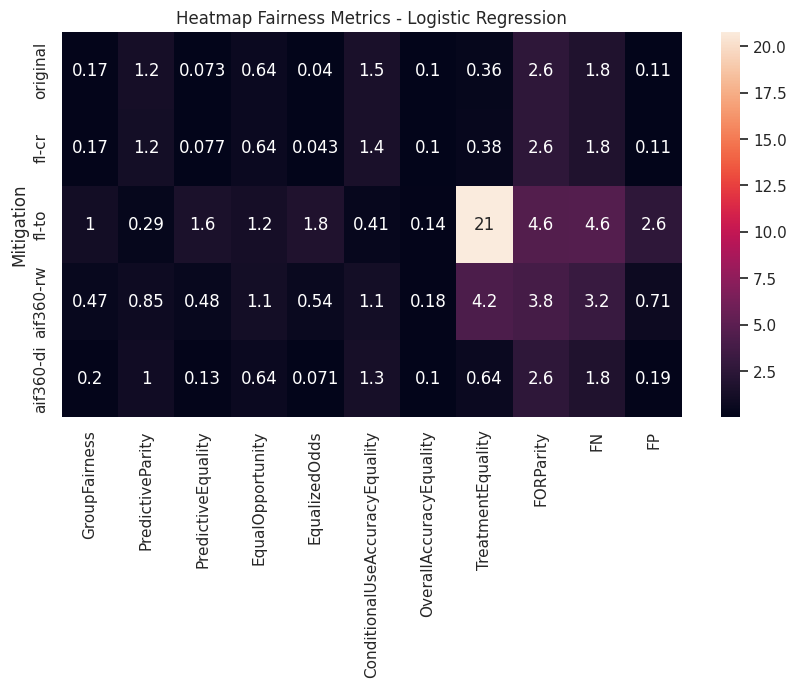

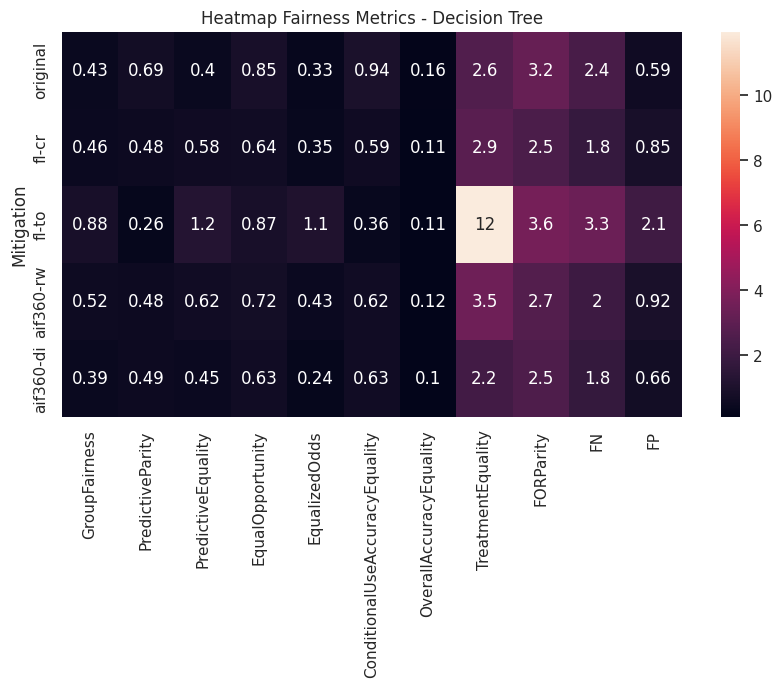

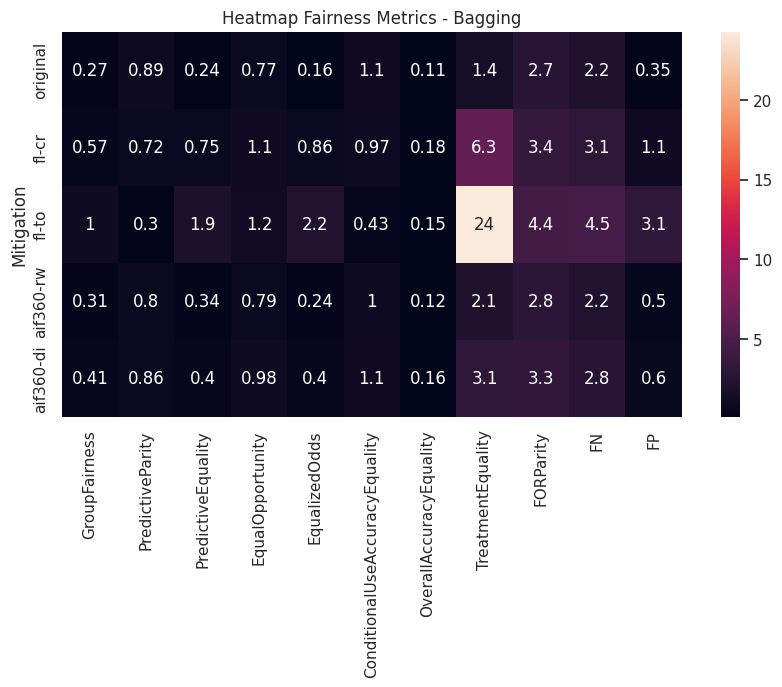

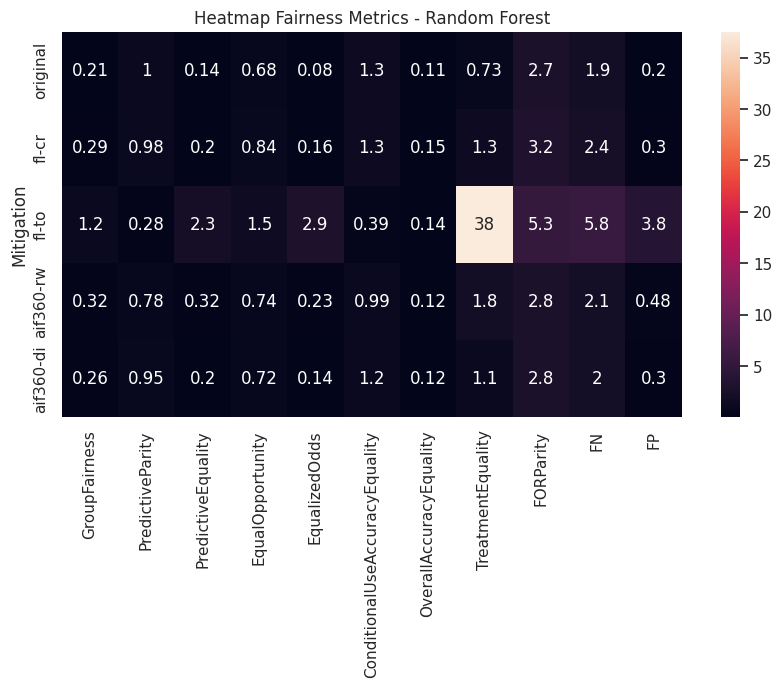

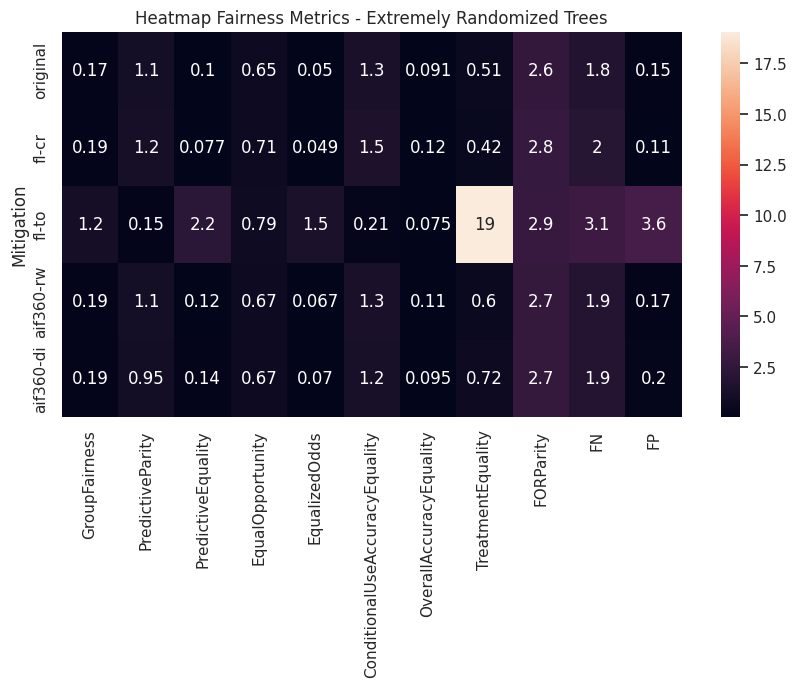

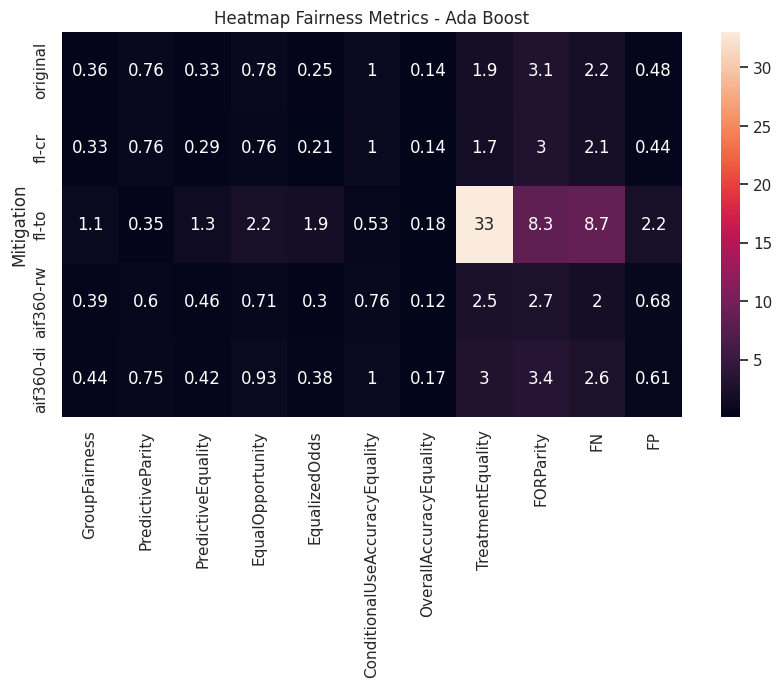

In [ ]:
sns.set()
for model in models:
  plt.figure(figsize=(10, 5))
  ax = sns.heatmap(data_framing(overall_metrics, 'diabetes-women', "division", model), annot=True)
  plt.title("Heatmap Fairness Metrics - {}".format(model))
  plt.show()